### Chemoattactrantant
For varying chemoattratctant for the collective cell structure model, we analyzed our simulated results as follows:

In [1]:
import glob
%matplotlib inline
import matplotlib
import random, pickle
import os
from matplotlib.patches import Patch, Rectangle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Experimenting

In [2]:
# Function to read and process data from a given folder
def read_and_process_data(folder_path, file_prefix, file_count=20):
    data_list = []

    # Loop through each CSV file and read the data
    for i in range(1, file_count + 1):
        file_path = os.path.join(folder_path, f'{file_prefix}{i}.csv')
        if os.path.exists(file_path):
            data = pd.read_csv(file_path)
            data['file_index'] = i  # Add an index to distinguish different datasets
            data_list.append(data)
        else:
            print(f"File not found: {file_path}")

    # Concatenate all data into a single DataFrame
    if data_list:
        all_data = pd.concat(data_list, ignore_index=True)
        # Convert mcs to days (1000 mcs = 1 day)
        all_data['days'] = all_data['mcs'] / 1000

        # Multiply cell_invasion by 2 to convert back to experimental value
        all_data['cell_invasion'] *= 2

        # Filter data to include only the first 2.5 days
        filtered_data = all_data[all_data['days'] <= 2.5]
    else:
        filtered_data = pd.DataFrame()

    return filtered_data

In [3]:
# Function to read and process data from a given folder
def read_and_process_cell_invasion(folder_path):
    data_list = []
    
    # Loop through each CSV file and read the data
    for i in range(1, 21):
        file_path = os.path.join(folder_path, f'celldata{i}.csv')
        if os.path.exists(file_path):
            data = pd.read_csv(file_path)
            data_list.append(data)
        else:
            print(f"File not found: {file_path}")

    # Concatenate all data into a single DataFrame
    if data_list:
        all_data = pd.concat(data_list, ignore_index=True)
        # Convert mcs to hours (1000 mcs = 24 hours, so 1 mcs = 0.024 hours)
        all_data['hours'] = all_data['mcs'] * 0.024

        # Multiply cell_invasion by 2
        all_data['cell_invasion'] *= 2

        # Calculate the 5th and 95th percentiles for cell_invasion at each hour
        percentile_data = all_data.groupby('hours')['cell_invasion'].agg(
            percentile_5th=lambda x: np.percentile(x, 5),
            percentile_95th=lambda x: np.percentile(x, 95)
        ).reset_index()
    else:
        percentile_data = pd.DataFrame(columns=['hours', 'percentile_5th', 'percentile_95th'])
    
    return percentile_data

In [4]:
# Function to calculate the average values for circularity and cell invasion
def calculate_averages(data, time_col='days', circularity_col='circularity', invasion_col='cell_invasion'):
    avg_data = data.groupby(time_col).agg({
        circularity_col: 'mean',
        invasion_col: 'mean'
    }).reset_index()
    return avg_data

In [5]:
# Function to calculate the average values for circularity and cell invasion per folder
def calculate_averages_per_folder(data, time_col='days', circularity_col='circularity', invasion_col='cell_invasion'):
    avg_data = data.groupby(time_col).agg({
        circularity_col: 'mean',
        invasion_col: 'mean'
    }).reset_index()
    return avg_data

#### CODE

In [6]:
# Read and process data from each folder
spheroid_folders = ['spheroid_c_0.001', 'spheroid_c_0.003', 'spheroid_c_0.005', 'spheroid_c_0.01','spheroid_c_0.03','spheroid_c_0.05', 'spheroid_c_0.1']
network_folders = [ 'network_c_0.001', 'network_c_0.003', 'network_c_0.005','network_c_0.01', 'network_c_0.03', 'network_c_0.05', 'network_c_0.1']


# Process spheroid data
spheroid_data = {}
spheroid_averages = {}
for folder in spheroid_folders:
    spheroid_data[folder] = read_and_process_data(os.path.join('spheroids', folder), 'celldata')
    spheroid_averages[folder] = calculate_averages_per_folder(spheroid_data[folder])

# Process network data
network_data = {}
network_averages = {}
for folder in network_folders:
    network_data[folder] = read_and_process_data(os.path.join('networks', folder), 'celldata')
    network_averages[folder] = calculate_averages_per_folder(network_data[folder])

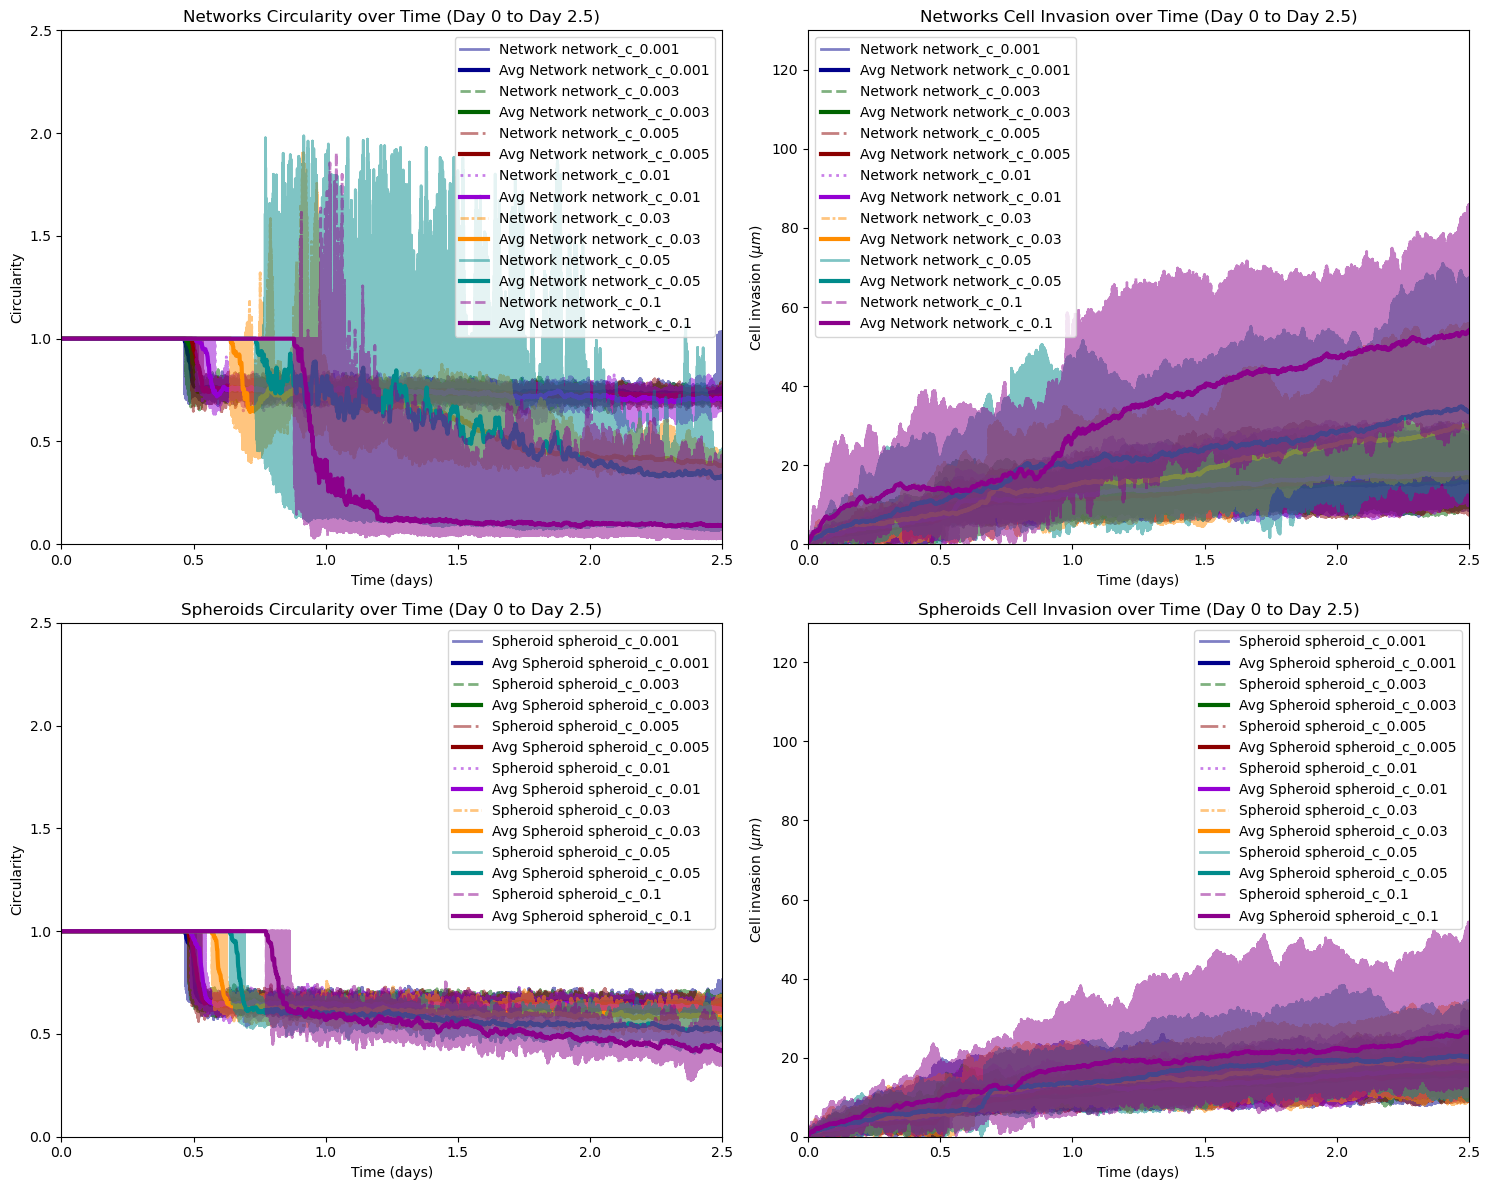

In [7]:
# Plotting
fig, ax = plt.subplots(2, 2, figsize=(15, 12))
# Define colors, line styles, and labels for the datasets
colors = ['darkblue', 'darkgreen', 'darkred', 'darkviolet', 'darkorange', 
          'darkcyan', 'darkmagenta', 'darkgoldenrod', 'darkslategray', 'darkkhaki']

line_styles = ['-', '--', '-.', ':', (0, (3, 1, 1, 1))]
alpha_value = 0.5  # Set transparency level

# Plot circularity for Networks
for i, folder in enumerate(network_folders):
    data = network_data[folder]
    if not data.empty:
        sorted_data = data.sort_values(by='days')  # Ensure data is sorted by days
        ax[0, 0].plot(sorted_data['days'], sorted_data['circularity'], label=f'Network {folder}', 
                      color=colors[i % len(colors)], linestyle=line_styles[i % len(line_styles)], linewidth=2, alpha=alpha_value)

    # Plot average circularity for each folder with distinct color
    avg_data = network_averages[folder]
    ax[0, 0].plot(avg_data['days'], avg_data['circularity'], label=f'Avg Network {folder}', color=colors[i % len(colors)], linewidth=3)

ax[0, 0].set_title('Networks Circularity over Time (Day 0 to Day 2.5)')
ax[0, 0].set_xlabel('Time (days)')
ax[0, 0].set_ylabel('Circularity')
ax[0, 0].legend()
ax[0, 0].set_xlim([0, 2.5])  # Ensure the plot is from day 0 to day 2.5
ax[0, 0].set_ylim([0, 2.5]) 
#ax[0, 0].grid(True)

# Plot cell invasion for Networks
for i, folder in enumerate(network_folders):
    data = network_data[folder]
    if not data.empty:
        sorted_data = data.sort_values(by='days')  # Ensure data is sorted by days
        ax[0, 1].plot(sorted_data['days'], sorted_data['cell_invasion'], label=f'Network {folder}', 
                      color=colors[i % len(colors)], linestyle=line_styles[i % len(line_styles)], linewidth=2, alpha=alpha_value)

    # Plot average cell invasion for each folder with distinct color
    avg_data = network_averages[folder]
    ax[0, 1].plot(avg_data['days'], avg_data['cell_invasion'], label=f'Avg Network {folder}', color=colors[i % len(colors)], linewidth=3)

ax[0, 1].set_title('Networks Cell Invasion over Time (Day 0 to Day 2.5)')
ax[0, 1].set_xlabel('Time (days)')
ax[0, 1].set_ylabel('Cell invasion ($ \mu m$)')
ax[0, 1].legend()
ax[0, 1].set_xlim([0, 2.5])  # Ensure the plot is from day 0 to day 2.5
ax[0, 1].set_ylim([0, 130]) 
#ax[0, 1].grid(True)

# Plot circularity for Spheroids
for i, folder in enumerate(spheroid_folders):
    data = spheroid_data[folder]
    if not data.empty:
        sorted_data = data.sort_values(by='days')  # Ensure data is sorted by days
        ax[1, 0].plot(sorted_data['days'], sorted_data['circularity'], label=f'Spheroid {folder}', 
                      color=colors[i % len(colors)], linestyle=line_styles[i % len(line_styles)], linewidth=2, alpha=alpha_value)

    # Plot average circularity for each folder with distinct color
    avg_data = spheroid_averages[folder]
    ax[1, 0].plot(avg_data['days'], avg_data['circularity'], label=f'Avg Spheroid {folder}', color=colors[i % len(colors)], linewidth=3)

ax[1, 0].set_title('Spheroids Circularity over Time (Day 0 to Day 2.5)')
ax[1, 0].set_xlabel('Time (days)')
ax[1, 0].set_ylabel('Circularity')
ax[1, 0].legend()
ax[1, 0].set_xlim([0, 2.5])  # Ensure the plot is from day 0 to day 2.5
ax[1, 0].set_ylim([0, 2.5]) 
#ax[1, 0].grid(True)

# Plot cell invasion for Spheroids
for i, folder in enumerate(spheroid_folders):
    data = spheroid_data[folder]
    if not data.empty:
        sorted_data = data.sort_values(by='days')  # Ensure data is sorted by days
        ax[1, 1].plot(sorted_data['days'], sorted_data['cell_invasion'], label=f'Spheroid {folder}', 
                      color=colors[i % len(colors)], linestyle=line_styles[i % len(line_styles)], linewidth=2, alpha=alpha_value)

    # Plot average cell invasion for each folder with distinct color
    avg_data = spheroid_averages[folder]
    ax[1, 1].plot(avg_data['days'], avg_data['cell_invasion'], label=f'Avg Spheroid {folder}', color=colors[i % len(colors)], linewidth=3)

ax[1, 1].set_title('Spheroids Cell Invasion over Time (Day 0 to Day 2.5)')
ax[1, 1].set_xlabel('Time (days)')
ax[1, 1].set_ylabel('Cell invasion ($ \mu m$)')
ax[1, 1].legend()
ax[1, 1].set_xlim([0, 2.5])  # Ensure the plot is from day 0 to day 2.5
ax[1, 1].set_ylim([0, 130]) 
#ax[1, 1].grid(True)

plt.tight_layout()
plt.savefig('circularity_cell_invasion_networks_spheroids_avg_distinct_colors.png', dpi=300, bbox_inches='tight')
plt.show()


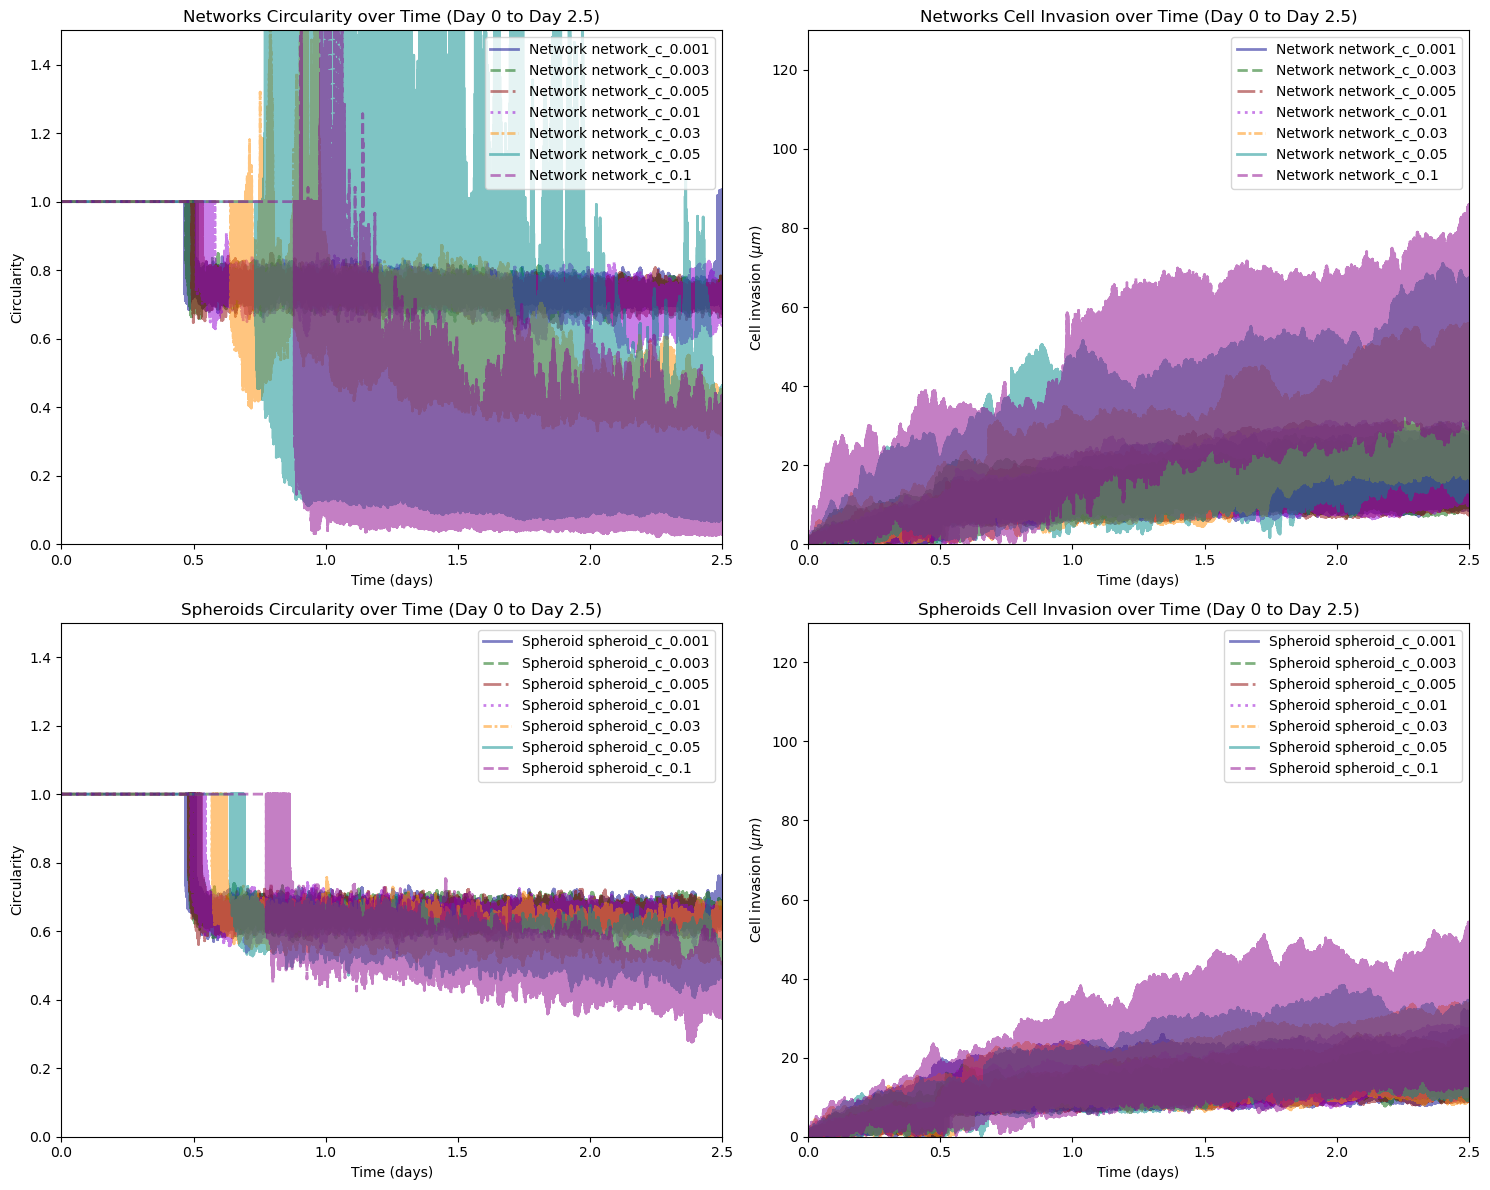

In [8]:
# import os
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt

# # Function to read and process data from a given folder
# def read_and_process_data(folder_path, file_prefix, file_count=20):
#     data_list = []

#     # Loop through each CSV file and read the data
#     for i in range(1, file_count + 1):
#         file_path = os.path.join(folder_path, f'{file_prefix}{i}.csv')
#         if os.path.exists(file_path):
#             data = pd.read_csv(file_path)
#             data['file_index'] = i  # Add an index to distinguish different datasets
#             data_list.append(data)
#         else:
#             print(f"File not found: {file_path}")

#     # Concatenate all data into a single DataFrame
#     if data_list:
#         all_data = pd.concat(data_list, ignore_index=True)
#         # Convert mcs to days (1000 mcs = 1 day)
#         all_data['days'] = all_data['mcs'] / 1000

#         # Multiply cell_invasion by 2 to convert back to experimental value
#         all_data['cell_invasion'] *= 2

#         # Filter data to include only the first 2.5 days
#         filtered_data = all_data[all_data['days'] <= 2.5]
#     else:
#         filtered_data = pd.DataFrame()

#     return filtered_data

# Function to calculate the average values for circularity and cell invasion
def calculate_averages(data, time_col='days', circularity_col='circularity', invasion_col='cell_invasion'):
    avg_data = data.groupby(time_col).agg({
        circularity_col: 'mean',
        invasion_col: 'mean'
    }).reset_index()
    return avg_data

# Read and process data from each folder
# spheroid_folders = ['spheroid_c_0.001', 'spheroid_c_0.003', 'spheroid_c_0.005', 'spheroid_c_0.01','spheroid_c_0.03','spheroid_c_0.05', 'spheroid_c_0.1']
# network_folders = [ 'network_c_0.001', 'network_c_0.003', 'network_c_0.005','network_c_0.01', 'network_c_0.03', 'network_c_0.05', 'network_c_0.1']


# Process spheroid data
spheroid_data = {}
for folder in spheroid_folders:
    spheroid_data[folder] = read_and_process_data(os.path.join('spheroids', folder), 'celldata')

# Process network data
network_data = {}
for folder in network_folders:
    network_data[folder] = read_and_process_data(os.path.join('networks', folder), 'celldata')

# Plotting
fig, ax = plt.subplots(2, 2, figsize=(15, 12))

# Define colors, line styles, and labels for the datasets
colors = ['darkblue', 'darkgreen', 'darkred', 'darkviolet', 'darkorange', 
          'darkcyan', 'darkmagenta', 'darkgoldenrod', 'darkslategray', 'darkkhaki']

line_styles = ['-', '--', '-.', ':', (0, (3, 1, 1, 1))]
alpha_value = 0.5  # Set transparency level for individual datasets

# Plot circularity for Networks
network_all_data = pd.concat(network_data.values(), ignore_index=True)
network_avg = calculate_averages(network_all_data)

for i, folder in enumerate(network_folders):
    data = network_data[folder]
    if not data.empty:
        sorted_data = data.sort_values(by='days')  # Ensure data is sorted by days
        ax[0, 0].plot(sorted_data['days'], sorted_data['circularity'], label=f'Network {folder}', 
                      color=colors[i % len(colors)], linestyle=line_styles[i % len(line_styles)], linewidth=2, alpha=alpha_value)

# Plot average circularity for Networks
#ax[0, 0].plot(network_avg['days'], network_avg['circularity'], label='Average Network', color='black', linestyle='-', linewidth=3)
ax[0, 0].set_title('Networks Circularity over Time (Day 0 to Day 2.5)')
ax[0, 0].set_xlabel('Time (days)')
ax[0, 0].set_ylabel('Circularity')
ax[0, 0].legend()
ax[0, 0].set_xlim([0, 2.5])  # Ensure the plot is from day 0 to day 2.5
ax[0, 0].set_ylim([0, 1.5]) 
#ax[0, 0].grid(True)

# Plot cell invasion for Networks
for i, folder in enumerate(network_folders):
    data = network_data[folder]
    if not data.empty:
        sorted_data = data.sort_values(by='days')  # Ensure data is sorted by days
        ax[0, 1].plot(sorted_data['days'], sorted_data['cell_invasion'], label=f'Network {folder}', 
                      color=colors[i % len(colors)], linestyle=line_styles[i % len(line_styles)], linewidth=2, alpha=alpha_value)

# Plot average cell invasion for Networks
#ax[0, 1].plot(network_avg['days'], network_avg['cell_invasion'], label='Average Network', color='black', linestyle='-', linewidth=3)
ax[0, 1].set_title('Networks Cell Invasion over Time (Day 0 to Day 2.5)')
ax[0, 1].set_xlabel('Time (days)')
ax[0, 1].set_ylabel('Cell invasion ($ \mu m$)')
ax[0, 1].legend()
ax[0, 1].set_xlim([0, 2.5])  # Ensure the plot is from day 0 to day 2.5
ax[0, 1].set_ylim([0, 130]) 
#ax[0, 1].grid(True)

# Plot circularity for Spheroids
spheroid_all_data = pd.concat(spheroid_data.values(), ignore_index=True)
spheroid_avg = calculate_averages(spheroid_all_data)

for i, folder in enumerate(spheroid_folders):
    data = spheroid_data[folder]
    if not data.empty:
        sorted_data = data.sort_values(by='days')  # Ensure data is sorted by days
        ax[1, 0].plot(sorted_data['days'], sorted_data['circularity'], label=f'Spheroid {folder}', 
                      color=colors[i % len(colors)], linestyle=line_styles[i % len(line_styles)], linewidth=2, alpha=alpha_value)

# Plot average circularity for Spheroids
#ax[1, 0].plot(spheroid_avg['days'], spheroid_avg['circularity'], label='Average Spheroid', color='black', linestyle='-', linewidth=3)
ax[1, 0].set_title('Spheroids Circularity over Time (Day 0 to Day 2.5)')
ax[1, 0].set_xlabel('Time (days)')
ax[1, 0].set_ylabel('Circularity')
ax[1, 0].legend()
ax[1, 0].set_xlim([0, 2.5])  # Ensure the plot is from day 0 to day 2.5
ax[1, 0].set_ylim([0, 1.5]) 
#ax[1, 0].grid(True)

# Plot cell invasion for Spheroids
for i, folder in enumerate(spheroid_folders):
    data = spheroid_data[folder]
    if not data.empty:
        sorted_data = data.sort_values(by='days')  # Ensure data is sorted by days
        ax[1, 1].plot(sorted_data['days'], sorted_data['cell_invasion'], label=f'Spheroid {folder}', 
                      color=colors[i % len(colors)], linestyle=line_styles[i % len(line_styles)], linewidth=2, alpha=alpha_value)

# Plot average cell invasion for Spheroids
#ax[1, 1].plot(spheroid_avg['days'], spheroid_avg['cell_invasion'], label='Average Spheroid', color='black', linestyle='-', linewidth=3)
ax[1, 1].set_title('Spheroids Cell Invasion over Time (Day 0 to Day 2.5)')
ax[1, 1].set_xlabel('Time (days)')
ax[1, 1].set_ylabel('Cell invasion ($ \mu m$)')
ax[1, 1].legend()
ax[1, 1].set_xlim([0, 2.5])  # Ensure the plot is from day 0 to day 2.5
ax[1, 1].set_ylim([0, 130]) 
#ax[1, 1].grid(True)

plt.tight_layout()
plt.savefig('circularity_cell_invasion_networks_spheroids_avg_plot_transparent1.png', dpi=300, bbox_inches='tight')
plt.show()

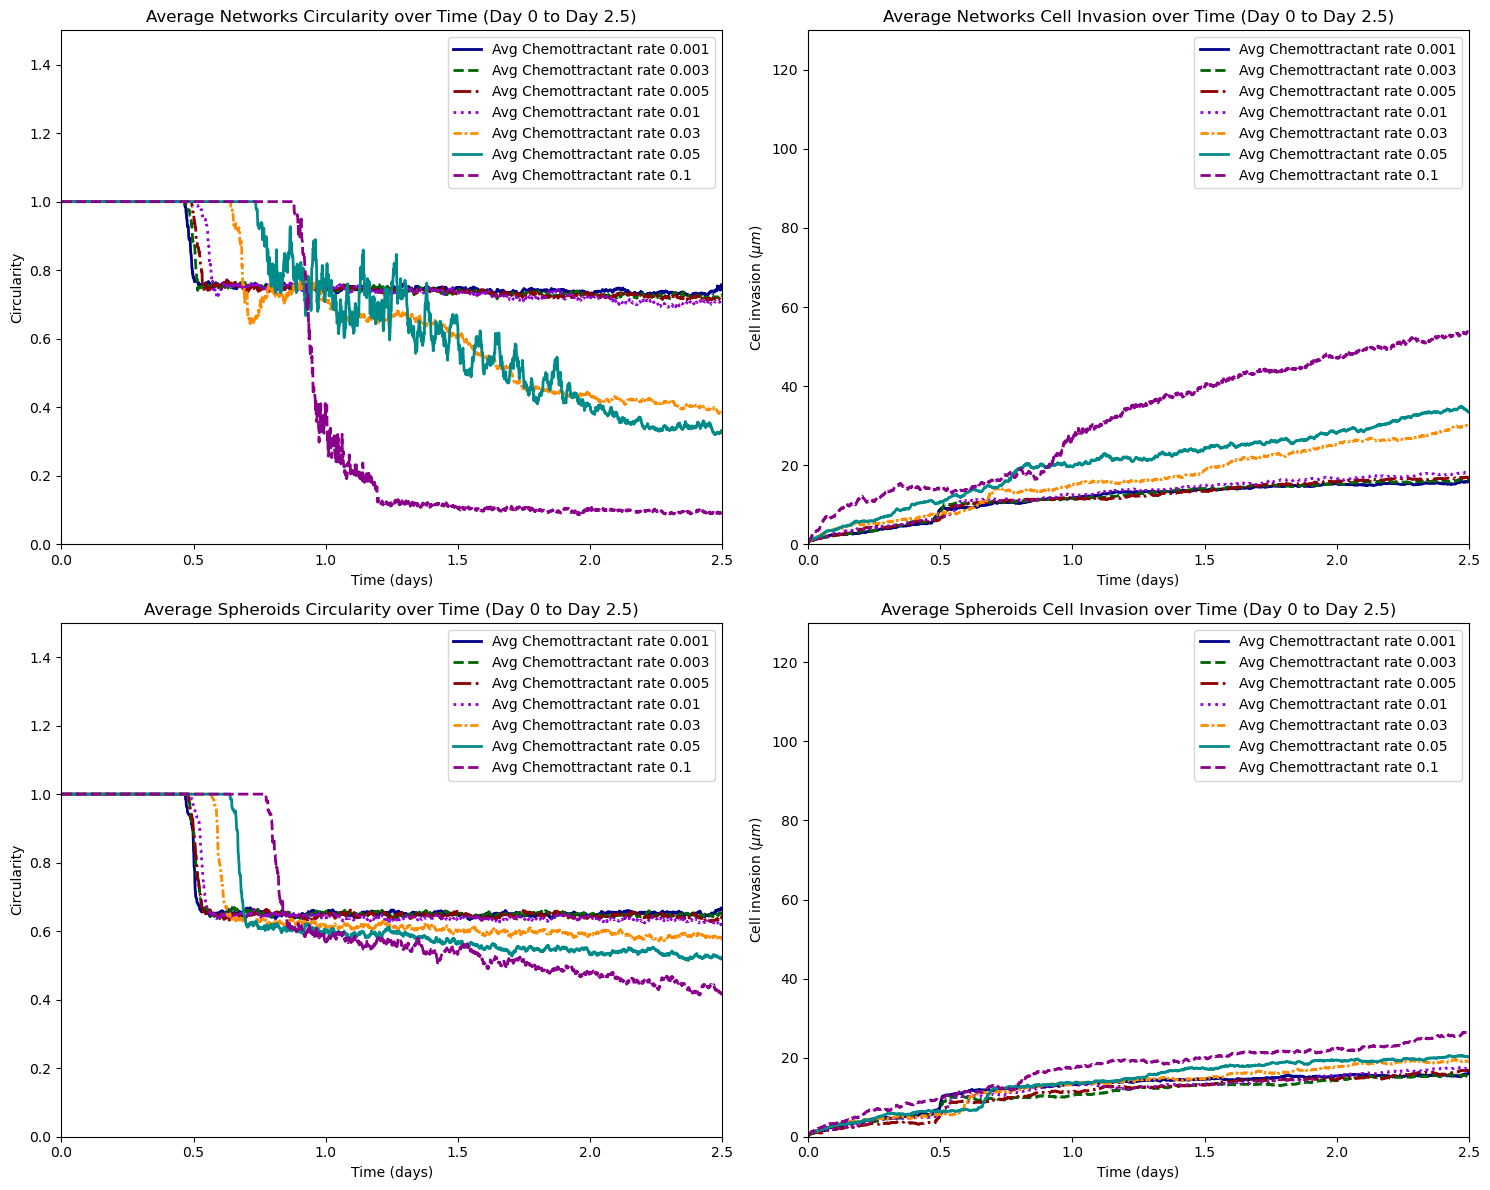

In [9]:
# # Function to read and process data from a given folder
# def read_and_process_data(folder_path, file_prefix, file_count=20):
#     data_list = []

#     # Loop through each CSV file and read the data
#     for i in range(1, file_count + 1):
#         file_path = os.path.join(folder_path, f'{file_prefix}{i}.csv')
#         if os.path.exists(file_path):
#             data = pd.read_csv(file_path)
#             data['file_index'] = i  # Add an index to distinguish different datasets
#             data_list.append(data)
#         else:
#             print(f"File not found: {file_path}")

#     # Concatenate all data into a single DataFrame
#     if data_list:
#         all_data = pd.concat(data_list, ignore_index=True)
#         # Convert mcs to days (1000 mcs = 1 day)
#         all_data['days'] = all_data['mcs'] / 1000

#         # Multiply cell_invasion by 2 to convert back to experimental value
#         all_data['cell_invasion'] *= 2

#         # Filter data to include only the first 2.5 days
#         filtered_data = all_data[all_data['days'] <= 2.5]
#     else:
#         filtered_data = pd.DataFrame()

#     return filtered_data

# # Function to calculate the average values for circularity and cell invasion
# def calculate_averages(data, time_col='days', circularity_col='circularity', invasion_col='cell_invasion'):
#     avg_data = data.groupby(time_col).agg({
#         circularity_col: 'mean',
#         invasion_col: 'mean'
#     }).reset_index()
#     return avg_data

# Read and process data from each folder
# spheroid_folders = ['spheroid_c_0.001', 'spheroid_c_0.003', 'spheroid_c_0.005', 'spheroid_c_0.01','spheroid_c_0.03','spheroid_c_0.05', 'spheroid_c_0.1']
# network_folders = [ 'network_c_0.001', 'network_c_0.003', 'network_c_0.005','network_c_0.01', 'network_c_0.03', 'network_c_0.05', 'network_c_0.1']

# Process and calculate averages for spheroid data
spheroid_averages = {}
for folder in spheroid_folders:
    folder_path = os.path.join('spheroids', folder)
    data = read_and_process_data(folder_path, 'celldata')
    spheroid_averages[folder] = calculate_averages(data)

# Process and calculate averages for network data
network_averages = {}
for folder in network_folders:
    folder_path = os.path.join('networks', folder)
    data = read_and_process_data(folder_path, 'celldata')
    network_averages[folder] = calculate_averages(data)

# Mapping of folder names to labels with chemottractant rates
label_mapping = {
    'spheroid_c_0.001': 'Chemottractant rate 0.001',
    'spheroid_c_0.003': 'Chemottractant rate 0.003',
    'spheroid_c_0.005': 'Chemottractant rate 0.005',
    'spheroid_c_0.01': 'Chemottractant rate 0.01',
    'spheroid_c_0.03': 'Chemottractant rate 0.03',
    'spheroid_c_0.05': 'Chemottractant rate 0.05',
    'spheroid_c_0.1': 'Chemottractant rate 0.1',

    'network_c_0.001': 'Chemottractant rate 0.001',
    'network_c_0.003': 'Chemottractant rate 0.003',
    'network_c_0.005': 'Chemottractant rate 0.005',
    'network_c_0.01': 'Chemottractant rate 0.01',
    'network_c_0.03': 'Chemottractant rate 0.03',
    'network_c_0.05': 'Chemottractant rate 0.05',
    'network_c_0.1': 'Chemottractant rate 0.1',
}


# Plotting
fig, ax = plt.subplots(2, 2, figsize=(15, 12))

# Define colors, line styles, and labels for the datasets
colors = ['darkblue', 'darkgreen', 'darkred', 'darkviolet', 'darkorange', 
          'darkcyan', 'darkmagenta', 'darkgoldenrod', 'darkslategray', 'darkkhaki']

line_styles = ['-', '--', '-.', ':', (0, (3, 1, 1, 1))]
alpha_value = 0.7  # Set transparency level for average plots

# Plot averages for circularity (Networks)
for i, folder in enumerate(network_folders):
    avg_data = network_averages[folder]
    if not avg_data.empty:
        ax[0, 0].plot(avg_data['days'], avg_data['circularity'], label=f'Avg {label_mapping[folder]}', 
                      color=colors[i % len(colors)], linestyle=line_styles[i % len(line_styles)], linewidth=2)

ax[0, 0].set_title('Average Networks Circularity over Time (Day 0 to Day 2.5)')
ax[0, 0].set_xlabel('Time (days)')
ax[0, 0].set_ylabel('Circularity')
ax[0, 0].legend()
ax[0, 0].set_xlim([0, 2.5])  # Ensure the plot is from day 0 to day 2.5
ax[0, 0].set_ylim([0, 1.5]) 
#ax[0, 0].grid(True)

# Plot averages for cell invasion (Networks)
for i, folder in enumerate(network_folders):
    avg_data = network_averages[folder]
    if not avg_data.empty:
        ax[0, 1].plot(avg_data['days'], avg_data['cell_invasion'], label=f'Avg {label_mapping[folder]}', 
                      color=colors[i % len(colors)], linestyle=line_styles[i % len(line_styles)], linewidth=2)

ax[0, 1].set_title('Average Networks Cell Invasion over Time (Day 0 to Day 2.5)')
ax[0, 1].set_xlabel('Time (days)')
ax[0, 1].set_ylabel('Cell invasion ($ \mu m$)')
ax[0, 1].legend()
ax[0, 1].set_xlim([0, 2.5])  # Ensure the plot is from day 0 to day 2.5
ax[0, 1].set_ylim([0, 130]) 
#ax[0, 1].grid(True)

# Plot averages for circularity (Spheroids)
for i, folder in enumerate(spheroid_folders):
    avg_data = spheroid_averages[folder]
    if not avg_data.empty:
        ax[1, 0].plot(avg_data['days'], avg_data['circularity'], label=f'Avg {label_mapping[folder]}', 
                      color=colors[i % len(colors)], linestyle=line_styles[i % len(line_styles)], linewidth=2)

ax[1, 0].set_title('Average Spheroids Circularity over Time (Day 0 to Day 2.5)')
ax[1, 0].set_xlabel('Time (days)')
ax[1, 0].set_ylabel('Circularity')
ax[1, 0].legend()
ax[1, 0].set_xlim([0, 2.5])  # Ensure the plot is from day 0 to day 2.5
ax[1, 0].set_ylim([0, 1.5]) 
#ax[1, 0].grid(True)

# Plot averages for cell invasion (Spheroids)
for i, folder in enumerate(spheroid_folders):
    avg_data = spheroid_averages[folder]
    if not avg_data.empty:
        ax[1, 1].plot(avg_data['days'], avg_data['cell_invasion'], label=f'Avg {label_mapping[folder]}', 
                      color=colors[i % len(colors)], linestyle=line_styles[i % len(line_styles)], linewidth=2)

ax[1, 1].set_title('Average Spheroids Cell Invasion over Time (Day 0 to Day 2.5)')
ax[1, 1].set_xlabel('Time (days)')
ax[1, 1].set_ylabel('Cell invasion ($ \mu m$)')
ax[1, 1].legend()
ax[1, 1].set_xlim([0, 2.5])  # Ensure the plot is from day 0 to day 2.5
ax[1, 1].set_ylim([0, 130]) 
#ax[1, 1].grid(True)

plt.tight_layout()
plt.savefig('average_circularity_cell_invasion_plot.png', dpi=300, bbox_inches='tight')
plt.show()


In [10]:
# import os
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt

# # Function to read and process data from a given folder
# def read_and_process_cell_invasion(folder_path):
#     data_list = []
    
#     # Loop through each CSV file and read the data
#     for i in range(1, 21):
#         file_path = os.path.join(folder_path, f'celldata{i}.csv')
#         if os.path.exists(file_path):
#             data = pd.read_csv(file_path)
#             data_list.append(data)
#         else:
#             print(f"File not found: {file_path}")

#     # Concatenate all data into a single DataFrame
#     if data_list:
#         all_data = pd.concat(data_list, ignore_index=True)
#         # Convert mcs to hours (1000 mcs = 24 hours, so 1 mcs = 0.024 hours)
#         all_data['hours'] = all_data['mcs'] * 0.024

#         # Multiply cell_invasion by 2
#         all_data['cell_invasion'] *= 2

#         # Calculate the 5th and 95th percentiles for cell_invasion at each hour
#         percentile_data = all_data.groupby('hours')['cell_invasion'].agg(
#             percentile_5th=lambda x: np.percentile(x, 5),
#             percentile_95th=lambda x: np.percentile(x, 95)
#         ).reset_index()
#     else:
#         percentile_data = pd.DataFrame(columns=['hours', 'percentile_5th', 'percentile_95th'])
    
#     return percentile_data

# # Read and process data from each folder
# folders_spheroid = ['spheroid_c_0.001', 'spheroid_c_0.003', 'spheroid_c_0.005', 'spheroid_c_0.01','spheroid_c_0.03','spheroid_c_0.05', 'spheroid_c_0.1']
# folders_network = [ 'network_c_0.001', 'network_c_0.003', 'network_c_0.005','network_c_0.01', 'network_c_0.03', 'network_c_0.05', 'network_c_0.1']

# data_spheroid = {folder: read_and_process_cell_invasion(os.path.join('spheroids', folder)) for folder in folders_spheroid}
# data_network = {folder: read_and_process_cell_invasion(os.path.join('networks', folder)) for folder in folders_network}

# # Prepare data for plotting
# def prepare_bar_data(data, time_filter):
#     data_at_time = data[data['hours'] == time_filter]
#     means = data_at_time['percentile_95th'].values
#     return means

# # Convert 2.5 days to hours
# time_filter = 2.5 * 24

# # Prepare data for plotting
# spheroid_means = prepare_bar_data(pd.concat(data_spheroid.values(), ignore_index=True), time_filter)
# network_means = prepare_bar_data(pd.concat(data_network.values(), ignore_index=True), time_filter)

# # Plotting
# fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# bar_width = 0.35
# index_spheroid = np.arange(len(folders_spheroid))
# index_network = np.arange(len(folders_network))

# # Bar plot for spheroids
# ax[0].bar(index_spheroid, spheroid_means, bar_width, color='lightblue')
# ax[0].set_title('Spheroids Cell Invasion at 2.5 Days')
# ax[0].set_xlabel('Chemoattractant Rate')
# ax[0].set_ylabel('Max Invasion ($\mu m$)')
# ax[0].set_xticks(index_spheroid)
# ax[0].set_xticklabels([f'{folder.split("_")[2]}' for folder in folders_spheroid])
# ax[0].set_ylim(0, max(spheroid_means) + 10)  # Adjust y-axis to fit data
# ax[0].grid(axis='y')

# # Bar plot for networks
# ax[1].bar(index_network, network_means, bar_width, color='lightcoral')
# ax[1].set_title('Networks Cell Invasion at 2.5 Days')
# ax[1].set_xlabel('Chemoattractant Rate')
# ax[1].set_ylabel('Max Invasion ($\mu m$)')
# ax[1].set_xticks(index_network)
# ax[1].set_xticklabels([f'{folder.split("_")[2]}' for folder in folders_network])
# ax[1].set_ylim(0, max(network_means) + 10)  # Adjust y-axis to fit data
# ax[1].grid(axis='y')

# plt.tight_layout()
# plt.savefig('cell_invasion_comparison_spheroids_networks_2_5_days_no_error_bars.png', dpi=300, bbox_inches='tight')
# plt.show()

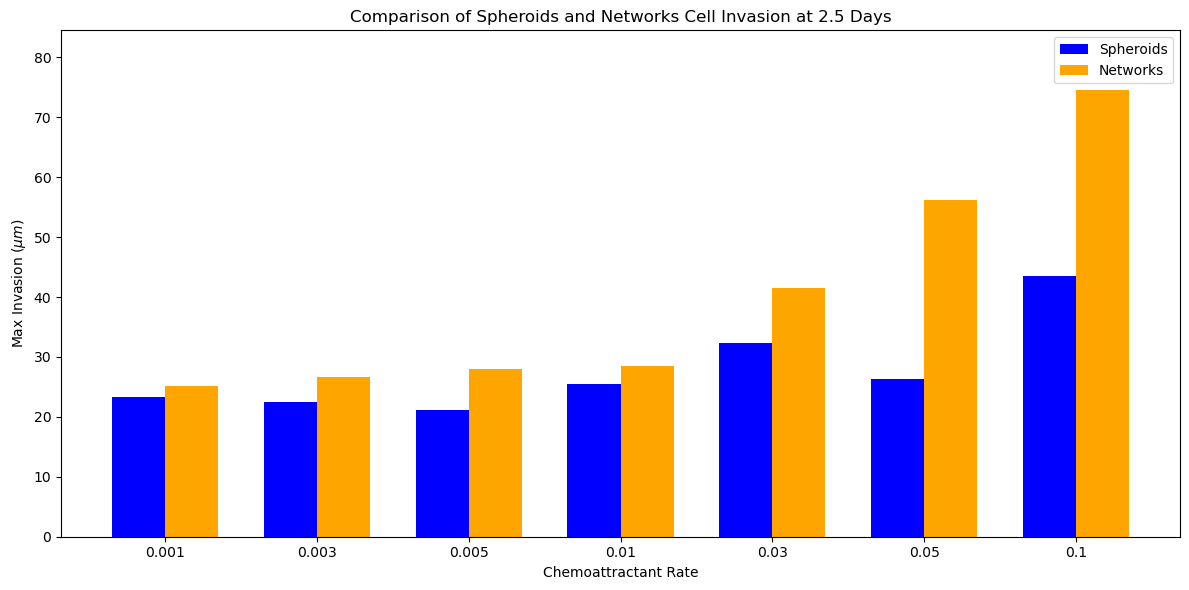

In [11]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Function to read and process data from a given folder
def read_and_process_cell_invasion(folder_path):
    data_list = []
    
    # Loop through each CSV file and read the data
    for i in range(1, 21):
        file_path = os.path.join(folder_path, f'celldata{i}.csv')
        if os.path.exists(file_path):
            data = pd.read_csv(file_path)
            data_list.append(data)
        else:
            print(f"File not found: {file_path}")

    # Concatenate all data into a single DataFrame
    if data_list:
        all_data = pd.concat(data_list, ignore_index=True)
        # Convert mcs to hours (1000 mcs = 24 hours, so 1 mcs = 0.024 hours)
        all_data['hours'] = all_data['mcs'] * 0.024

        # Multiply cell_invasion by 2
        all_data['cell_invasion'] *= 2

        # Calculate the 5th and 95th percentiles for cell_invasion at each hour
        percentile_data = all_data.groupby('hours')['cell_invasion'].agg(
            percentile_5th=lambda x: np.percentile(x, 5),
            percentile_95th=lambda x: np.percentile(x, 95)
        ).reset_index()
    else:
        percentile_data = pd.DataFrame(columns=['hours', 'percentile_5th', 'percentile_95th'])
    
    return percentile_data

# Read and process data from each folder
folders_spheroid = ['spheroid_c_0.001', 'spheroid_c_0.003', 'spheroid_c_0.005', 'spheroid_c_0.01', 'spheroid_c_0.03', 'spheroid_c_0.05', 'spheroid_c_0.1']
folders_network = ['network_c_0.001', 'network_c_0.003', 'network_c_0.005', 'network_c_0.01', 'network_c_0.03', 'network_c_0.05', 'network_c_0.1']

data_spheroid = {folder: read_and_process_cell_invasion(os.path.join('spheroids', folder)) for folder in folders_spheroid}
data_network = {folder: read_and_process_cell_invasion(os.path.join('networks', folder)) for folder in folders_network}

# Prepare data for plotting
def prepare_bar_data(data, time_filter):
    data_at_time = data[data['hours'] == time_filter]
    means = data_at_time['percentile_95th'].values
    return means

# Convert 2.5 days to hours
time_filter = 2.5 * 24

# Prepare data for plotting
spheroid_means = prepare_bar_data(pd.concat(data_spheroid.values(), ignore_index=True), time_filter)
network_means = prepare_bar_data(pd.concat(data_network.values(), ignore_index=True), time_filter)

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))

bar_width = 0.35
index = np.arange(len(folders_spheroid))

# Bar plot for spheroids and networks
bars1 = ax.bar(index, spheroid_means, bar_width, label='Spheroids', color='blue')
bars2 = ax.bar(index + bar_width, network_means, bar_width, label='Networks', color='orange')

# Set labels and title
ax.set_title('Comparison of Spheroids and Networks Cell Invasion at 2.5 Days')
ax.set_xlabel('Chemoattractant Rate')
ax.set_ylabel('Max Invasion ($\mu m$)')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels([f'{folder.split("_")[2]}' for folder in folders_spheroid])

# Add a legend
ax.legend()

# Adjust y-axis to fit data
ax.set_ylim(0, max(max(spheroid_means), max(network_means)) + 10)
#ax.grid(axis='y')

# Save and show the plot
plt.tight_layout()
plt.savefig('cell_invasion_comparison_spheroids_networks_2_5_days_combined.png', dpi=300, bbox_inches='tight')
plt.show()


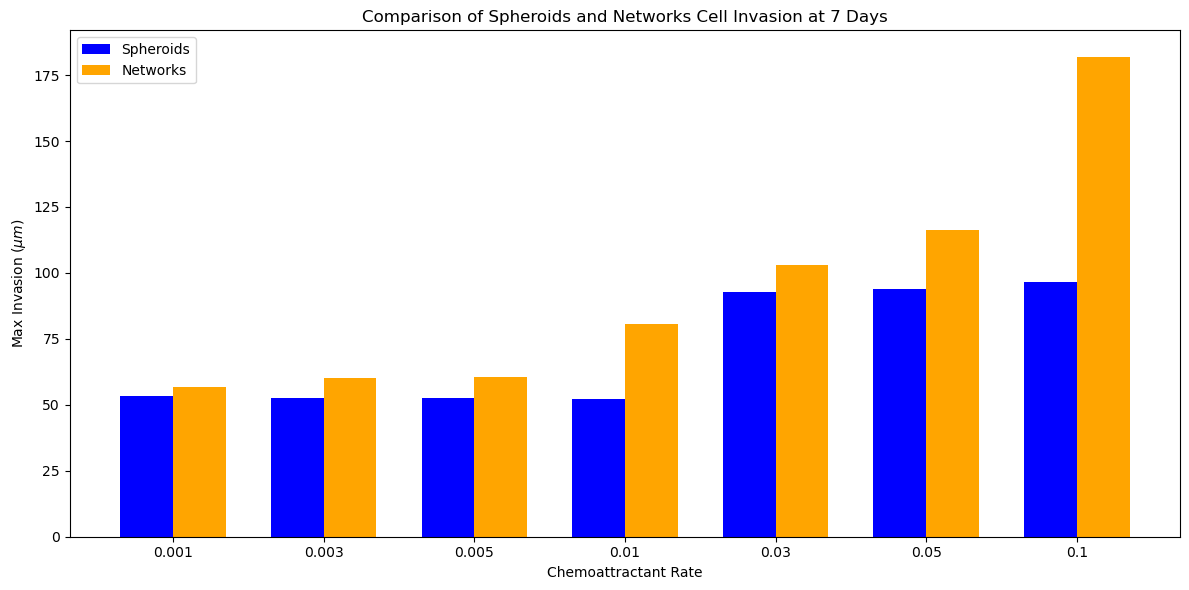

In [12]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Function to read and process data from a given folder
def read_and_process_cell_invasion(folder_path):
    data_list = []
    
    # Loop through each CSV file and read the data
    for i in range(1, 21):
        file_path = os.path.join(folder_path, f'celldata{i}.csv')
        if os.path.exists(file_path):
            data = pd.read_csv(file_path)
            data_list.append(data)
        else:
            print(f"File not found: {file_path}")

    # Concatenate all data into a single DataFrame
    if data_list:
        all_data = pd.concat(data_list, ignore_index=True)
        # Convert mcs to hours (1000 mcs = 24 hours, so 1 mcs = 0.024 hours)
        all_data['hours'] = all_data['mcs'] * 0.024

        # Multiply cell_invasion by 2
        all_data['cell_invasion'] *= 2

        # Calculate the 5th and 95th percentiles for cell_invasion at each hour
        percentile_data = all_data.groupby('hours')['cell_invasion'].agg(
            percentile_5th=lambda x: np.percentile(x, 5),
            percentile_95th=lambda x: np.percentile(x, 95)
        ).reset_index()
    else:
        percentile_data = pd.DataFrame(columns=['hours', 'percentile_5th', 'percentile_95th'])
    
    return percentile_data

# Read and process data from each folder
folders_spheroid = ['spheroid_c_0.001', 'spheroid_c_0.003', 'spheroid_c_0.005', 'spheroid_c_0.01', 'spheroid_c_0.03', 'spheroid_c_0.05', 'spheroid_c_0.1']
folders_network = ['network_c_0.001', 'network_c_0.003', 'network_c_0.005', 'network_c_0.01', 'network_c_0.03', 'network_c_0.05', 'network_c_0.1']

data_spheroid = {folder: read_and_process_cell_invasion(os.path.join('spheroids', folder)) for folder in folders_spheroid}
data_network = {folder: read_and_process_cell_invasion(os.path.join('networks', folder)) for folder in folders_network}

# Prepare data for plotting
def prepare_bar_data(data, time_filter):
    data_at_time = data[data['hours'] == time_filter]
    means = data_at_time['percentile_95th'].values
    return means

# Convert 7 days to hours (7 days * 24 hours = 168 hours)
time_filter = 7 * 24

# Prepare data for plotting
spheroid_means = prepare_bar_data(pd.concat(data_spheroid.values(), ignore_index=True), time_filter)
network_means = prepare_bar_data(pd.concat(data_network.values(), ignore_index=True), time_filter)

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))

bar_width = 0.35
index = np.arange(len(folders_spheroid))

# Bar plot for spheroids and networks
bars1 = ax.bar(index, spheroid_means, bar_width, label='Spheroids', color='blue')
bars2 = ax.bar(index + bar_width, network_means, bar_width, label='Networks', color='orange')

# Set labels and title
ax.set_title('Comparison of Spheroids and Networks Cell Invasion at 7 Days')
ax.set_xlabel('Chemoattractant Rate')
ax.set_ylabel('Max Invasion ($\mu m$)')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels([f'{folder.split("_")[2]}' for folder in folders_spheroid])

# Add a legend
ax.legend()

# Adjust y-axis to fit data
ax.set_ylim(0, max(max(spheroid_means), max(network_means)) + 10)
#ax.grid(axis='y')

# Save and show the plot
plt.tight_layout()
plt.savefig('cell_invasion_comparison_spheroids_networks_7_days_combined.png', dpi=300, bbox_inches='tight')
plt.show()


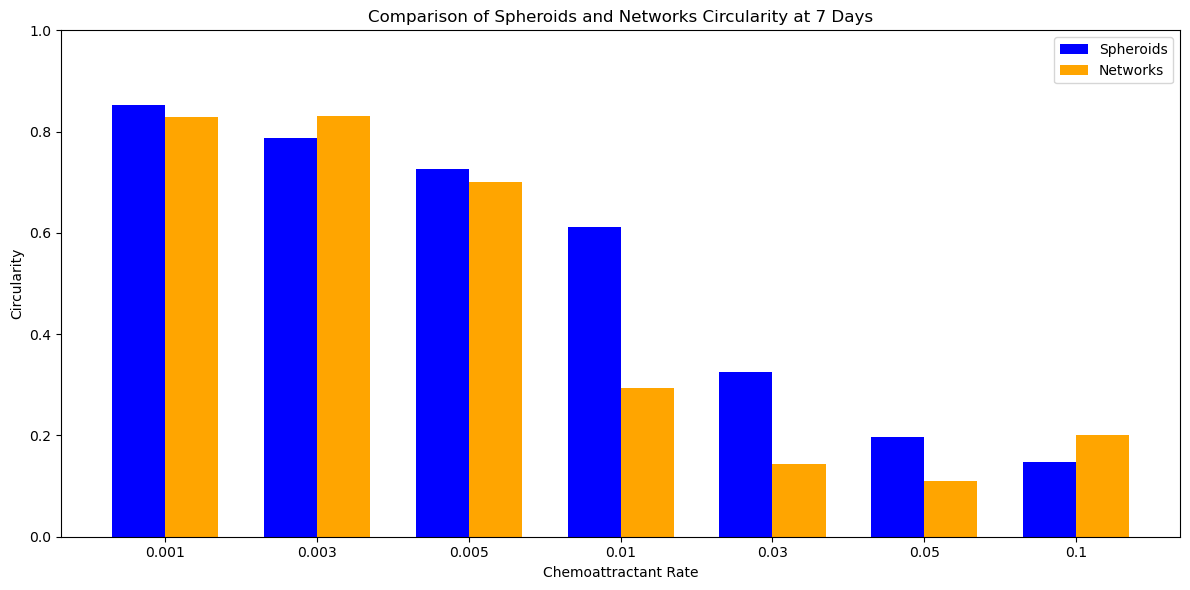

In [13]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Function to read and process circularity data from a given folder
def read_and_process_circularity(folder_path):
    data_list = []

    # Loop through each CSV file and read the data
    for i in range(1, 21):
        file_path = os.path.join(folder_path, f'celldata{i}.csv')
        if os.path.exists(file_path):
            data = pd.read_csv(file_path)
            data_list.append(data)
        else:
            print(f"File not found: {file_path}")

    # Concatenate all data into a single DataFrame
    if data_list:
        all_data = pd.concat(data_list, ignore_index=True)
        # Convert mcs to hours (1000 mcs = 24 hours, so 1 mcs = 0.024 hours)
        all_data['hours'] = all_data['mcs'] * 0.024

        # Calculate the maximum circularity for each hour across all replicas
        summary_data = all_data.groupby('hours')['circularity'].max().reset_index()
    else:
        summary_data = pd.DataFrame(columns=['hours', 'circularity'])

    return summary_data

# Read and process data from each folder
folders_spheroid = ['spheroid_c_0.001', 'spheroid_c_0.003', 'spheroid_c_0.005', 'spheroid_c_0.01','spheroid_c_0.03','spheroid_c_0.05', 'spheroid_c_0.1']
folders_network = [ 'network_c_0.001', 'network_c_0.003', 'network_c_0.005','network_c_0.01', 'network_c_0.03', 'network_c_0.05', 'network_c_0.1']

data_spheroid = {folder: read_and_process_circularity(os.path.join('spheroids', folder)) for folder in folders_spheroid}
data_network = {folder: read_and_process_circularity(os.path.join('networks', folder)) for folder in folders_network}

# Prepare data for plotting
def prepare_circularity_data(data, time_filter):
    data_at_time = data[data['hours'] == time_filter]
    means = data_at_time['circularity'].values
    return means

# Convert 7 days to hours
time_filter = 7 * 24

# Prepare data for plotting
spheroid_means = [prepare_circularity_data(data_spheroid[folder], time_filter) for folder in folders_spheroid]
network_means = [prepare_circularity_data(data_network[folder], time_filter) for folder in folders_network]

# Flatten lists and prepare for bar plotting
spheroid_means_flat = [mean[0] if len(mean) > 0 else 0 for mean in spheroid_means]
network_means_flat = [mean[0] if len(mean) > 0 else 0 for mean in network_means]

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))

bar_width = 0.35
index = np.arange(len(folders_spheroid))

# Bar plot for spheroids and networks side by side for each chemoattractant rate
bars1 = ax.bar(index, spheroid_means_flat, bar_width, label='Spheroids', color='blue')
bars2 = ax.bar(index + bar_width, network_means_flat, bar_width, label='Networks', color='orange')

# Set labels and title
ax.set_title('Comparison of Spheroids and Networks Circularity at 7 Days')
ax.set_xlabel('Chemoattractant Rate')
ax.set_ylabel('Circularity')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels([f'{folder.split("_")[2]}' for folder in folders_spheroid])

# Add a legend
ax.legend()

# Adjust y-axis to fit data
ax.set_ylim(0, 1)  # Circularity should be between 0 and 1
#ax.grid(axis='y')

# Save and show the plot
plt.tight_layout()
plt.savefig('circularity_comparison_spheroids_networks_7_days_grouped.png', dpi=300, bbox_inches='tight')
plt.show()


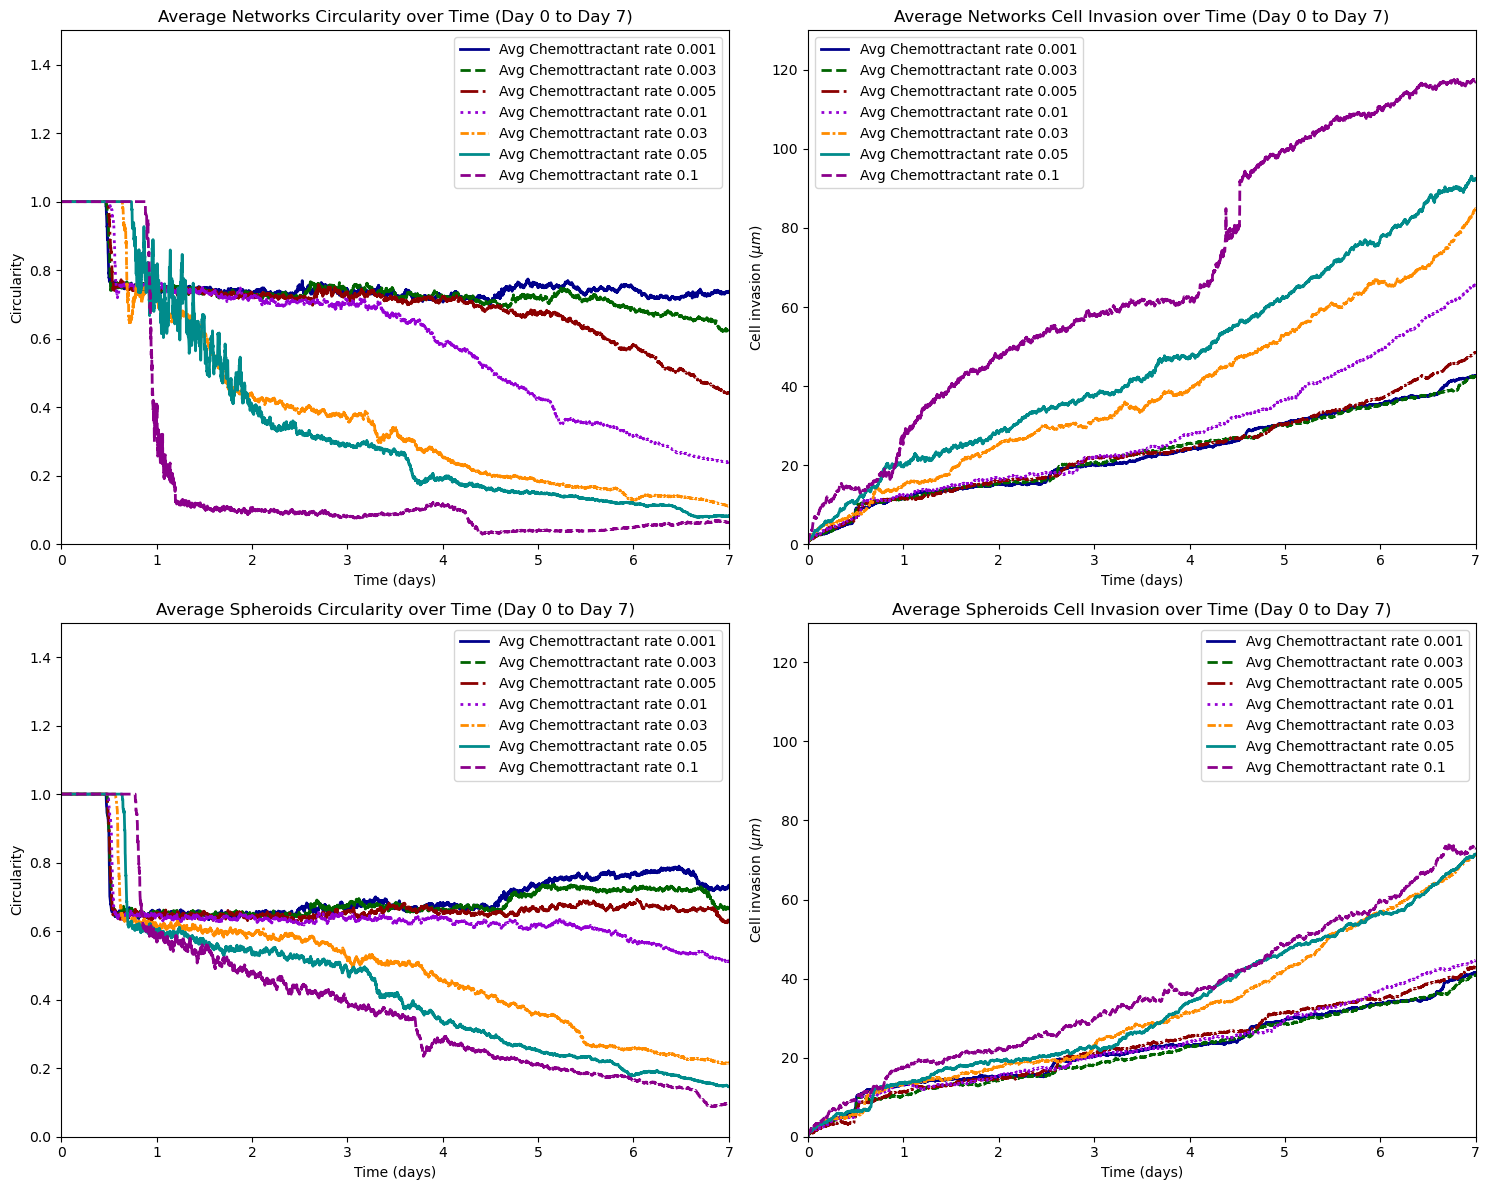

In [14]:
# Function to read and process data from a given folder
def read_and_process_data(folder_path, file_prefix, file_count=20):
    data_list = []

    # Loop through each CSV file and read the data
    for i in range(1, file_count + 1):
        file_path = os.path.join(folder_path, f'{file_prefix}{i}.csv')
        if os.path.exists(file_path):
            data = pd.read_csv(file_path)
            data['file_index'] = i  # Add an index to distinguish different datasets
            data_list.append(data)
        else:
            print(f"File not found: {file_path}")

    # Concatenate all data into a single DataFrame
    if data_list:
        all_data = pd.concat(data_list, ignore_index=True)
        # Convert mcs to days (1000 mcs = 1 day)
        all_data['days'] = all_data['mcs'] / 1000

        # Multiply cell_invasion by 2 to convert back to experimental value
        all_data['cell_invasion'] *= 2

        # Filter data to include only the first 7 days
        filtered_data = all_data[all_data['days'] <= 7]
    else:
        filtered_data = pd.DataFrame()

    return filtered_data

# Function to calculate the average values for circularity and cell invasion
def calculate_averages(data, time_col='days', circularity_col='circularity', invasion_col='cell_invasion'):
    avg_data = data.groupby(time_col).agg({
        circularity_col: 'mean',
        invasion_col: 'mean'
    }).reset_index()
    return avg_data

# Define folder structure
# Read and process data from each folder
folders_spheroid = ['spheroid_c_0.001', 'spheroid_c_0.003', 'spheroid_c_0.005', 'spheroid_c_0.01','spheroid_c_0.03','spheroid_c_0.05', 'spheroid_c_0.1']
folders_network = [ 'network_c_0.001', 'network_c_0.003', 'network_c_0.005','network_c_0.01', 'network_c_0.03', 'network_c_0.05', 'network_c_0.1']


# Process and calculate averages for spheroid data
spheroid_averages = {}
for folder in spheroid_folders:
    folder_path = os.path.join('spheroids', folder)
    data = read_and_process_data(folder_path, 'celldata')
    spheroid_averages[folder] = calculate_averages(data)

# Process and calculate averages for network data
network_averages = {}
for folder in network_folders:
    folder_path = os.path.join('networks', folder)
    data = read_and_process_data(folder_path, 'celldata')
    network_averages[folder] = calculate_averages(data)

# Mapping of folder names to labels with chemottractant rates
label_mapping = {
    'spheroid_c_0.001': 'Chemottractant rate 0.001',
    'spheroid_c_0.003': 'Chemottractant rate 0.003',
    'spheroid_c_0.005': 'Chemottractant rate 0.005',
    'spheroid_c_0.01': 'Chemottractant rate 0.01',
    'spheroid_c_0.03': 'Chemottractant rate 0.03',
    'spheroid_c_0.05': 'Chemottractant rate 0.05',
    'spheroid_c_0.1': 'Chemottractant rate 0.1',

    'network_c_0.001': 'Chemottractant rate 0.001',
    'network_c_0.003': 'Chemottractant rate 0.003',
    'network_c_0.005': 'Chemottractant rate 0.005',
    'network_c_0.01': 'Chemottractant rate 0.01',
    'network_c_0.03': 'Chemottractant rate 0.03',
    'network_c_0.05': 'Chemottractant rate 0.05',
    'network_c_0.1': 'Chemottractant rate 0.1',
}

# Plotting
fig, ax = plt.subplots(2, 2, figsize=(15, 12))

# Define colors, line styles, and labels for the datasets
colors = ['darkblue', 'darkgreen', 'darkred', 'darkviolet', 'darkorange', 
          'darkcyan', 'darkmagenta', 'darkgoldenrod', 'darkslategray', 'darkkhaki']

line_styles = ['-', '--', '-.', ':', (0, (3, 1, 1, 1))]
alpha_value = 0.7  # Set transparency level for average plots

# Plot averages for circularity (Networks)
for i, folder in enumerate(network_folders):
    avg_data = network_averages[folder]
    if not avg_data.empty:
        ax[0, 0].plot(avg_data['days'], avg_data['circularity'], label=f'Avg {label_mapping[folder]}', 
                      color=colors[i % len(colors)], linestyle=line_styles[i % len(line_styles)], linewidth=2)

ax[0, 0].set_title('Average Networks Circularity over Time (Day 0 to Day 7)')
ax[0, 0].set_xlabel('Time (days)')
ax[0, 0].set_ylabel('Circularity')
ax[0, 0].legend()
ax[0, 0].set_xlim([0, 7])  # Ensure the plot is from day 0 to day 7
ax[0, 0].set_ylim([0, 1.5]) 
#ax[0, 0].grid(True)

# Plot averages for cell invasion (Networks)
for i, folder in enumerate(network_folders):
    avg_data = network_averages[folder]
    if not avg_data.empty:
        ax[0, 1].plot(avg_data['days'], avg_data['cell_invasion'], label=f'Avg {label_mapping[folder]}', 
                      color=colors[i % len(colors)], linestyle=line_styles[i % len(line_styles)], linewidth=2)

ax[0, 1].set_title('Average Networks Cell Invasion over Time (Day 0 to Day 7)')
ax[0, 1].set_xlabel('Time (days)')
ax[0, 1].set_ylabel('Cell invasion ($ \mu m$)')
ax[0, 1].legend()
ax[0, 1].set_xlim([0, 7])  # Ensure the plot is from day 0 to day 7
ax[0, 1].set_ylim([0, 130]) 
#ax[0, 1].grid(True)

# Plot averages for circularity (Spheroids)
for i, folder in enumerate(spheroid_folders):
    avg_data = spheroid_averages[folder]
    if not avg_data.empty:
        ax[1, 0].plot(avg_data['days'], avg_data['circularity'], label=f'Avg {label_mapping[folder]}', 
                      color=colors[i % len(colors)], linestyle=line_styles[i % len(line_styles)], linewidth=2)

ax[1, 0].set_title('Average Spheroids Circularity over Time (Day 0 to Day 7)')
ax[1, 0].set_xlabel('Time (days)')
ax[1, 0].set_ylabel('Circularity')
ax[1, 0].legend()
ax[1, 0].set_xlim([0, 7])  # Ensure the plot is from day 0 to day 7
ax[1, 0].set_ylim([0, 1.5]) 
#ax[1, 0].grid(True)

# Plot averages for cell invasion (Spheroids)
for i, folder in enumerate(spheroid_folders):
    avg_data = spheroid_averages[folder]
    if not avg_data.empty:
        ax[1, 1].plot(avg_data['days'], avg_data['cell_invasion'], label=f'Avg {label_mapping[folder]}', 
                      color=colors[i % len(colors)], linestyle=line_styles[i % len(line_styles)], linewidth=2)

ax[1, 1].set_title('Average Spheroids Cell Invasion over Time (Day 0 to Day 7)')
ax[1, 1].set_xlabel('Time (days)')
ax[1, 1].set_ylabel('Cell invasion ($ \mu m$)')
ax[1, 1].legend()
ax[1, 1].set_xlim([0, 7])  # Ensure the plot is from day 0 to day 7
ax[1, 1].set_ylim([0, 130]) 
#ax[1, 1].grid(True)

plt.tight_layout()
plt.savefig('average_circularity_cell_invasion_plot_7_days.png', dpi=300, bbox_inches='tight')
plt.show()

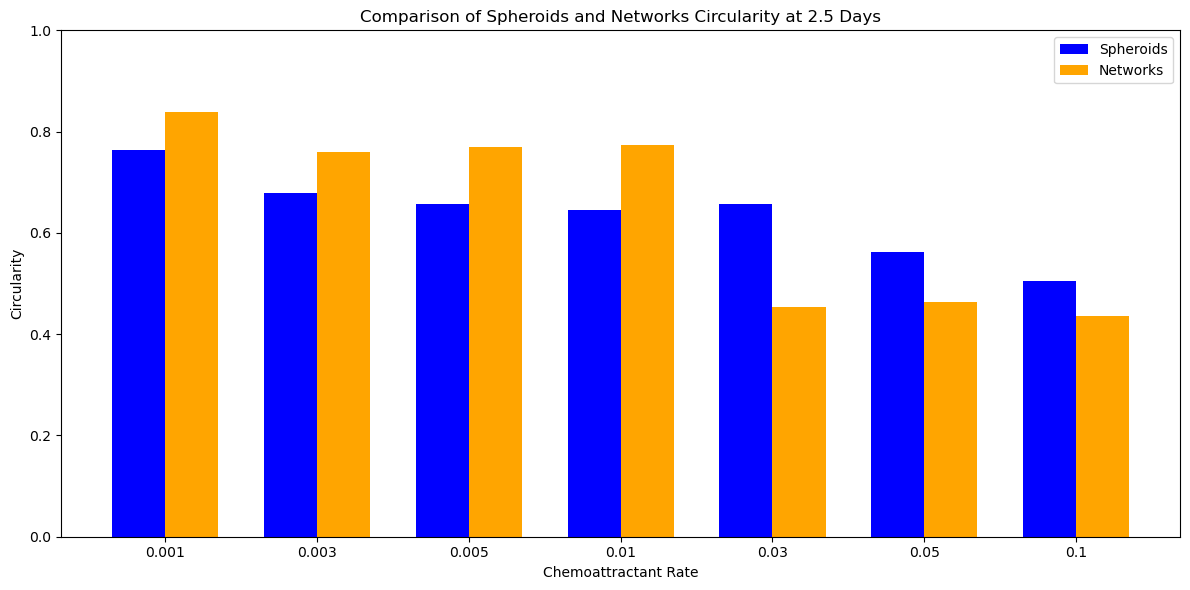

In [15]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Function to read and process circularity data from a given folder
def read_and_process_circularity(folder_path):
    data_list = []

    # Loop through each CSV file and read the data
    for i in range(1, 21):
        file_path = os.path.join(folder_path, f'celldata{i}.csv')
        if os.path.exists(file_path):
            data = pd.read_csv(file_path)
            data_list.append(data)
        else:
            print(f"File not found: {file_path}")

    # Concatenate all data into a single DataFrame
    if data_list:
        all_data = pd.concat(data_list, ignore_index=True)
        # Convert mcs to hours (1000 mcs = 24 hours, so 1 mcs = 0.024 hours)
        all_data['hours'] = all_data['mcs'] * 0.024

        # Calculate the maximum circularity for each hour across all replicas
        summary_data = all_data.groupby('hours')['circularity'].max().reset_index()
    else:
        summary_data = pd.DataFrame(columns=['hours', 'circularity'])

    return summary_data

# Read and process data from each folder
folders_spheroid = ['spheroid_c_0.001', 'spheroid_c_0.003', 'spheroid_c_0.005', 'spheroid_c_0.01', 'spheroid_c_0.03', 'spheroid_c_0.05', 'spheroid_c_0.1']
folders_network = ['network_c_0.001', 'network_c_0.003', 'network_c_0.005', 'network_c_0.01', 'network_c_0.03', 'network_c_0.05', 'network_c_0.1']

data_spheroid = {folder: read_and_process_circularity(os.path.join('spheroids', folder)) for folder in folders_spheroid}
data_network = {folder: read_and_process_circularity(os.path.join('networks', folder)) for folder in folders_network}

# Prepare data for plotting
def prepare_circularity_data(data, time_filter):
    data_at_time = data[data['hours'] == time_filter]
    means = data_at_time['circularity'].values
    return means

# Convert 2.5 days to hours (2.5 * 24 = 60 hours)
time_filter = 2.5 * 24

# Prepare data for plotting
spheroid_means = [prepare_circularity_data(data_spheroid[folder], time_filter) for folder in folders_spheroid]
network_means = [prepare_circularity_data(data_network[folder], time_filter) for folder in folders_network]

# Flatten lists and prepare for bar plotting
spheroid_means_flat = [mean[0] if len(mean) > 0 else 0 for mean in spheroid_means]
network_means_flat = [mean[0] if len(mean) > 0 else 0 for mean in network_means]

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))

bar_width = 0.35
index = np.arange(len(folders_spheroid))

# Bar plot for spheroids and networks side by side for each chemoattractant rate
bars1 = ax.bar(index, spheroid_means_flat, bar_width, label='Spheroids', color='blue')
bars2 = ax.bar(index + bar_width, network_means_flat, bar_width, label='Networks', color='orange')

# Set labels and title
ax.set_title('Comparison of Spheroids and Networks Circularity at 2.5 Days')
ax.set_xlabel('Chemoattractant Rate')
ax.set_ylabel('Circularity')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels([f'{folder.split("_")[2]}' for folder in folders_spheroid])

# Add a legend
ax.legend()

# Adjust y-axis to fit data
ax.set_ylim(0, 1)  # Circularity should be between 0 and 1
#ax.grid(axis='y')

# Save and show the plot
plt.tight_layout()
plt.savefig('circularity_comparison_spheroids_networks_2_5_days_grouped.png', dpi=300, bbox_inches='tight')
plt.show()


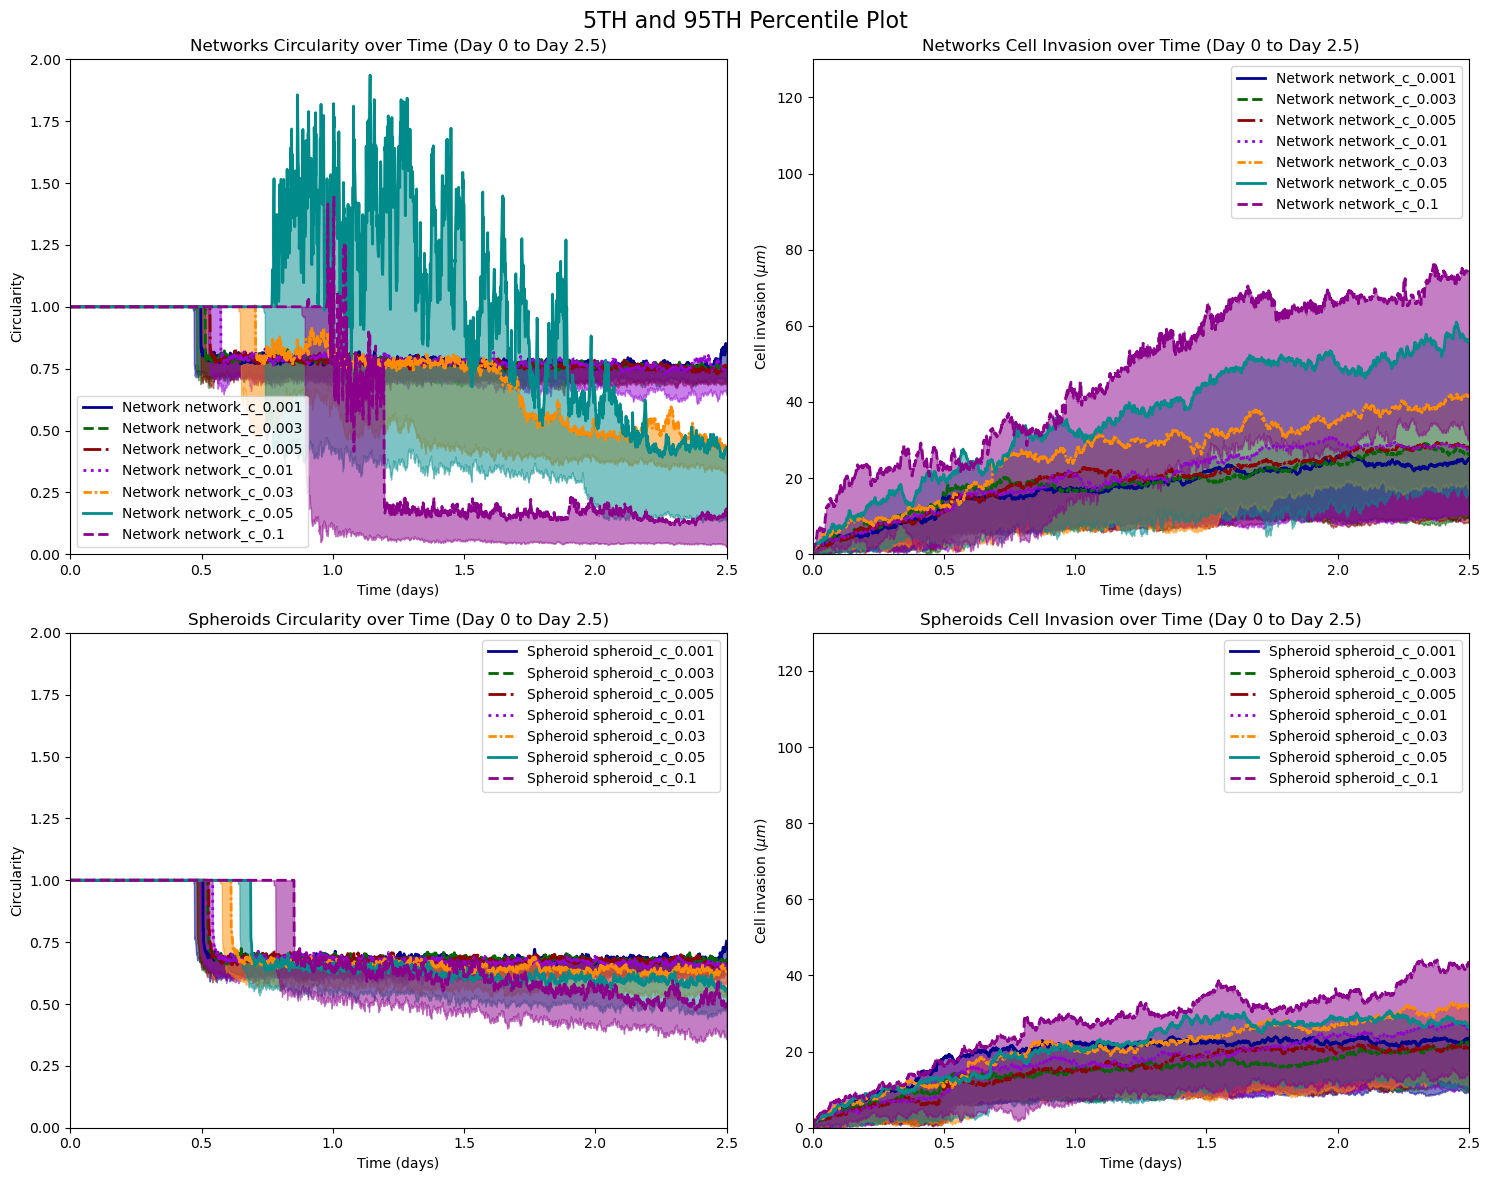

In [16]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Function to read and process data from a given folder
def read_and_process_data(folder_path, file_prefix, file_count=20):
    data_list = []

    # Loop through each CSV file and read the data
    for i in range(1, file_count + 1):
        file_path = os.path.join(folder_path, f'{file_prefix}{i}.csv')
        if os.path.exists(file_path):
            data = pd.read_csv(file_path)
            data['file_index'] = i  # Add an index to distinguish different datasets
            data_list.append(data)
        else:
            print(f"File not found: {file_path}")

    # Concatenate all data into a single DataFrame
    if data_list:
        all_data = pd.concat(data_list, ignore_index=True)
        # Convert mcs to days (1000 mcs = 1 day)
        all_data['days'] = all_data['mcs'] / 1000

        # Multiply cell_invasion by 2 to convert back to experimental value
        all_data['cell_invasion'] *= 2

        # Filter data to include only the first 2.5 days
        filtered_data = all_data[all_data['days'] <= 2.5]

        # Calculate percentiles
        percentile_data = filtered_data.groupby('days').agg({
            'circularity': [lambda x: np.percentile(x, 5), lambda x: np.percentile(x, 95)],
            'cell_invasion': [lambda x: np.percentile(x, 5), lambda x: np.percentile(x, 95)]
        }).reset_index()

        # Flatten MultiIndex columns
        percentile_data.columns = ['days', 'circularity_5th', 'circularity_95th', 'cell_invasion_5th', 'cell_invasion_95th']

    else:
        percentile_data = pd.DataFrame()

    return percentile_data

# Read and process data from each folder
spheroid_folders = ['spheroid_c_0.001', 'spheroid_c_0.003', 'spheroid_c_0.005', 'spheroid_c_0.01', 'spheroid_c_0.03', 'spheroid_c_0.05', 'spheroid_c_0.1']
network_folders = ['network_c_0.001', 'network_c_0.003', 'network_c_0.005', 'network_c_0.01', 'network_c_0.03', 'network_c_0.05', 'network_c_0.1']

# Process spheroid data
spheroid_data = {}
for folder in spheroid_folders:
    spheroid_data[folder] = read_and_process_data(os.path.join('spheroids', folder), 'celldata')

# Process network data
network_data = {}
for folder in network_folders:
    network_data[folder] = read_and_process_data(os.path.join('networks', folder), 'celldata')

# Plotting
fig, ax = plt.subplots(2, 2, figsize=(15, 12))

# Define colors, line styles, and labels for the datasets
colors = ['darkblue', 'darkgreen', 'darkred', 'darkviolet', 'darkorange', 
          'darkcyan', 'darkmagenta', 'darkgoldenrod', 'darkslategray', 'darkkhaki']

line_styles = ['-', '--', '-.', ':', (0, (3, 1, 1, 1))]
alpha_value = 0.5  # Set transparency level for individual datasets

# Plot circularity for Networks
for i, folder in enumerate(network_folders):
    data = network_data[folder]
    if not data.empty:
        sorted_data = data.sort_values(by='days')  # Ensure data is sorted by days
        ax[0, 0].fill_between(sorted_data['days'], sorted_data['circularity_5th'], sorted_data['circularity_95th'],
                              color=colors[i % len(colors)], alpha=alpha_value)
        ax[0, 0].plot(sorted_data['days'], sorted_data['circularity_95th'], label=f'Network {folder}', 
                      color=colors[i % len(colors)], linestyle=line_styles[i % len(line_styles)], linewidth=2)

# Plot circularity for Spheroids
for i, folder in enumerate(spheroid_folders):
    data = spheroid_data[folder]
    if not data.empty:
        sorted_data = data.sort_values(by='days')  # Ensure data is sorted by days
        ax[1, 0].fill_between(sorted_data['days'], sorted_data['circularity_5th'], sorted_data['circularity_95th'],
                              color=colors[i % len(colors)], alpha=alpha_value)
        ax[1, 0].plot(sorted_data['days'], sorted_data['circularity_95th'], label=f'Spheroid {folder}', 
                      color=colors[i % len(colors)], linestyle=line_styles[i % len(line_styles)], linewidth=2)

# Plot cell invasion for Networks
for i, folder in enumerate(network_folders):
    data = network_data[folder]
    if not data.empty:
        sorted_data = data.sort_values(by='days')  # Ensure data is sorted by days
        ax[0, 1].fill_between(sorted_data['days'], sorted_data['cell_invasion_5th'], sorted_data['cell_invasion_95th'],
                              color=colors[i % len(colors)], alpha=alpha_value)
        ax[0, 1].plot(sorted_data['days'], sorted_data['cell_invasion_95th'], label=f'Network {folder}', 
                      color=colors[i % len(colors)], linestyle=line_styles[i % len(line_styles)], linewidth=2)

# Plot cell invasion for Spheroids
for i, folder in enumerate(spheroid_folders):
    data = spheroid_data[folder]
    if not data.empty:
        sorted_data = data.sort_values(by='days')  # Ensure data is sorted by days
        ax[1, 1].fill_between(sorted_data['days'], sorted_data['cell_invasion_5th'], sorted_data['cell_invasion_95th'],
                              color=colors[i % len(colors)], alpha=alpha_value)
        ax[1, 1].plot(sorted_data['days'], sorted_data['cell_invasion_95th'], label=f'Spheroid {folder}', 
                      color=colors[i % len(colors)], linestyle=line_styles[i % len(line_styles)], linewidth=2)

# Setting titles and labels
ax[0, 0].set_title('Networks Circularity over Time (Day 0 to Day 2.5)')
ax[0, 0].set_xlabel('Time (days)')
ax[0, 0].set_ylabel('Circularity')
ax[0, 0].legend()
ax[0, 0].set_xlim([0, 2.5])  # Ensure the plot is from day 0 to day 2.5
ax[0, 0].set_ylim([0, 2.0]) 
#ax[0, 0].grid(True)

ax[0, 1].set_title('Networks Cell Invasion over Time (Day 0 to Day 2.5)')
ax[0, 1].set_xlabel('Time (days)')
ax[0, 1].set_ylabel('Cell invasion ($ \mu m$)')
ax[0, 1].legend()
ax[0, 1].set_xlim([0, 2.5])  # Ensure the plot is from day 0 to day 2.5
ax[0, 1].set_ylim([0, 130]) 
#ax[0, 1].grid(True)

ax[1, 0].set_title('Spheroids Circularity over Time (Day 0 to Day 2.5)')
ax[1, 0].set_xlabel('Time (days)')
ax[1, 0].set_ylabel('Circularity')
ax[1, 0].legend()
ax[1, 0].set_xlim([0, 2.5])  # Ensure the plot is from day 0 to day 2.5
ax[1, 0].set_ylim([0, 2.0]) 
#ax[1, 0].grid(True)

ax[1, 1].set_title('Spheroids Cell Invasion over Time (Day 0 to Day 2.5)')
ax[1, 1].set_xlabel('Time (days)')
ax[1, 1].set_ylabel('Cell invasion ($ \mu m$)')
ax[1, 1].legend()
ax[1, 1].set_xlim([0, 2.5])  # Ensure the plot is from day 0 to day 2.5
ax[1, 1].set_ylim([0, 130]) 
#ax[1, 1].grid(True)



# Add an overarching title
fig.suptitle('5TH and 95TH Percentile Plot', fontsize=16)

             
plt.tight_layout()
plt.savefig('circularity_cell_invasion_networks_spheroids_percentiles_plot.png', dpi=300, bbox_inches='tight')
plt.show()


In [17]:
#### MEAN AND STANDARD DEVIATION

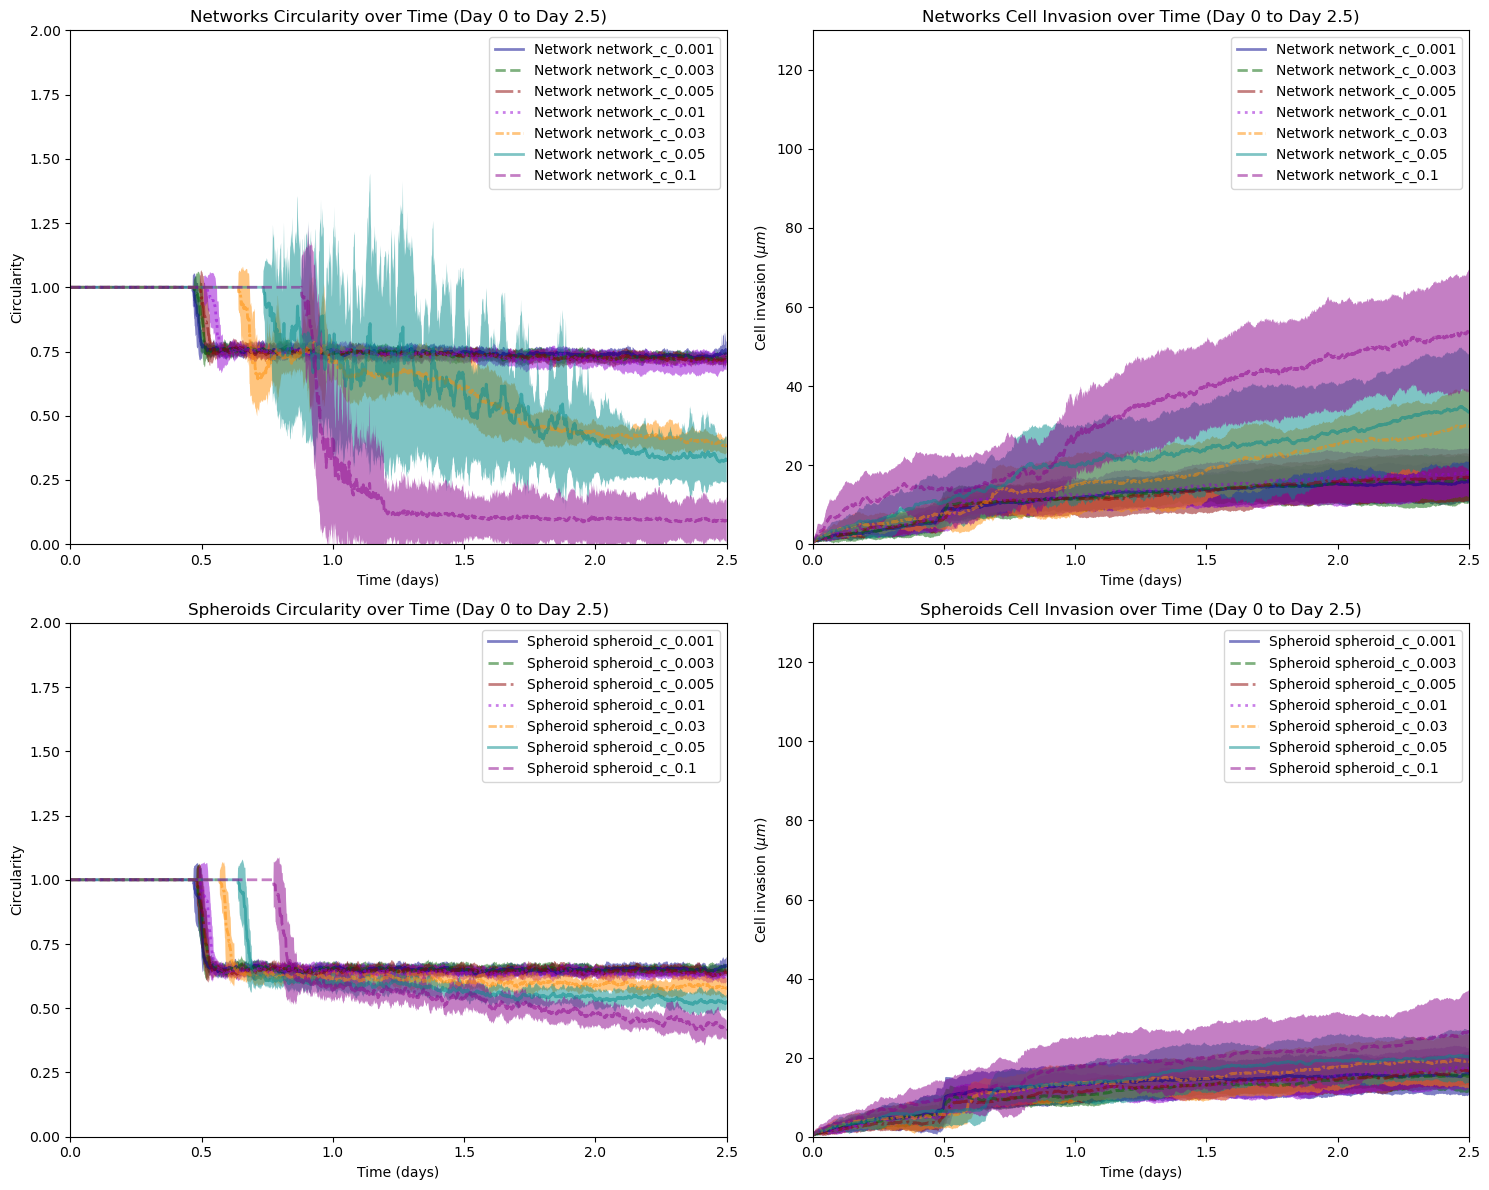

In [18]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Function to read and process data from a given folder
def read_and_process_data(folder_path, file_prefix, file_count=20):
    data_list = []

    # Loop through each CSV file and read the data
    for i in range(1, file_count + 1):
        file_path = os.path.join(folder_path, f'{file_prefix}{i}.csv')
        if os.path.exists(file_path):
            data = pd.read_csv(file_path)
            data['file_index'] = i  # Add an index to distinguish different datasets
            data_list.append(data)
        else:
            print(f"File not found: {file_path}")

    # Concatenate all data into a single DataFrame
    if data_list:
        all_data = pd.concat(data_list, ignore_index=True)
        # Convert mcs to days (1000 mcs = 1 day)
        all_data['days'] = all_data['mcs'] / 1000

        # Multiply cell_invasion by 2 to convert back to experimental value
        all_data['cell_invasion'] *= 2

        # Filter data to include only the first 2.5 days
        filtered_data = all_data[all_data['days'] <= 2.5]

        # Calculate mean and standard deviation
        stats_data = filtered_data.groupby('days').agg({
            'circularity': ['mean', 'std'],
            'cell_invasion': ['mean', 'std']
        }).reset_index()

        # Flatten MultiIndex columns
        stats_data.columns = ['days', 'circularity_mean', 'circularity_std', 'cell_invasion_mean', 'cell_invasion_std']

    else:
        stats_data = pd.DataFrame()

    return stats_data

# Read and process data from each folder
spheroid_folders = ['spheroid_c_0.001', 'spheroid_c_0.003', 'spheroid_c_0.005', 'spheroid_c_0.01', 'spheroid_c_0.03', 'spheroid_c_0.05', 'spheroid_c_0.1']
network_folders = ['network_c_0.001', 'network_c_0.003', 'network_c_0.005', 'network_c_0.01', 'network_c_0.03', 'network_c_0.05', 'network_c_0.1']

# Process spheroid data
spheroid_data = {}
for folder in spheroid_folders:
    spheroid_data[folder] = read_and_process_data(os.path.join('spheroids', folder), 'celldata')

# Process network data
network_data = {}
for folder in network_folders:
    network_data[folder] = read_and_process_data(os.path.join('networks', folder), 'celldata')

# Plotting
fig, ax = plt.subplots(2, 2, figsize=(15, 12))

# Define colors, line styles, and labels for the datasets
colors = ['darkblue', 'darkgreen', 'darkred', 'darkviolet', 'darkorange', 
          'darkcyan', 'darkmagenta', 'darkgoldenrod', 'darkslategray', 'darkkhaki']

line_styles = ['-', '--', '-.', ':', (0, (3, 1, 1, 1))]
alpha_value = 0.5  # Set transparency level for individual datasets

# Plot circularity for Networks
for i, folder in enumerate(network_folders):
    data = network_data[folder]
    if not data.empty:
        sorted_data = data.sort_values(by='days')  # Ensure data is sorted by days
        ax[0, 0].plot(sorted_data['days'], sorted_data['circularity_mean'], label=f'Network {folder}', 
                      color=colors[i % len(colors)], linestyle=line_styles[i % len(line_styles)], linewidth=2, alpha=alpha_value)
        ax[0, 0].fill_between(sorted_data['days'], 
                              sorted_data['circularity_mean'] - sorted_data['circularity_std'], 
                              sorted_data['circularity_mean'] + sorted_data['circularity_std'], 
                              color=colors[i % len(colors)], alpha=alpha_value, edgecolor=None)

# Plot circularity for Spheroids
for i, folder in enumerate(spheroid_folders):
    data = spheroid_data[folder]
    if not data.empty:
        sorted_data = data.sort_values(by='days')  # Ensure data is sorted by days
        ax[1, 0].plot(sorted_data['days'], sorted_data['circularity_mean'], label=f'Spheroid {folder}', 
                      color=colors[i % len(colors)], linestyle=line_styles[i % len(line_styles)], linewidth=2, alpha=alpha_value)
        ax[1, 0].fill_between(sorted_data['days'], 
                              sorted_data['circularity_mean'] - sorted_data['circularity_std'], 
                              sorted_data['circularity_mean'] + sorted_data['circularity_std'], 
                              color=colors[i % len(colors)], alpha=alpha_value, edgecolor=None)

# Plot cell invasion for Networks
for i, folder in enumerate(network_folders):
    data = network_data[folder]
    if not data.empty:
        sorted_data = data.sort_values(by='days')  # Ensure data is sorted by days
        ax[0, 1].plot(sorted_data['days'], sorted_data['cell_invasion_mean'], label=f'Network {folder}', 
                      color=colors[i % len(colors)], linestyle=line_styles[i % len(line_styles)], linewidth=2, alpha=alpha_value)
        ax[0, 1].fill_between(sorted_data['days'], 
                              sorted_data['cell_invasion_mean'] - sorted_data['cell_invasion_std'], 
                              sorted_data['cell_invasion_mean'] + sorted_data['cell_invasion_std'], 
                              color=colors[i % len(colors)], alpha=alpha_value, edgecolor=None)

# Plot cell invasion for Spheroids
for i, folder in enumerate(spheroid_folders):
    data = spheroid_data[folder]
    if not data.empty:
        sorted_data = data.sort_values(by='days')  # Ensure data is sorted by days
        ax[1, 1].plot(sorted_data['days'], sorted_data['cell_invasion_mean'], label=f'Spheroid {folder}', 
                      color=colors[i % len(colors)], linestyle=line_styles[i % len(line_styles)], linewidth=2, alpha=alpha_value)
        ax[1, 1].fill_between(sorted_data['days'], 
                              sorted_data['cell_invasion_mean'] - sorted_data['cell_invasion_std'], 
                              sorted_data['cell_invasion_mean'] + sorted_data['cell_invasion_std'], 
                              color=colors[i % len(colors)], alpha=alpha_value, edgecolor=None)

# Setting titles and labels
ax[0, 0].set_title('Networks Circularity over Time (Day 0 to Day 2.5)')
ax[0, 0].set_xlabel('Time (days)')
ax[0, 0].set_ylabel('Circularity')
ax[0, 0].legend()
ax[0, 0].set_xlim([0, 2.5])  # Ensure the plot is from day 0 to day 2.5
ax[0, 0].set_ylim([0.0, 2.0])
#ax[0, 0].grid(True)

ax[0, 1].set_title('Networks Cell Invasion over Time (Day 0 to Day 2.5)')
ax[0, 1].set_xlabel('Time (days)')
ax[0, 1].set_ylabel('Cell invasion ($ \mu m$)')
ax[0, 1].legend()
ax[0, 1].set_xlim([0, 2.5])  # Ensure the plot is from day 0 to day 2.5
ax[0, 1].set_ylim([0.0, 130.0])
#ax[0, 1].grid(True)

ax[1, 0].set_title('Spheroids Circularity over Time (Day 0 to Day 2.5)')
ax[1, 0].set_xlabel('Time (days)')
ax[1, 0].set_ylabel('Circularity')
ax[1, 0].legend()
ax[1, 0].set_xlim([0, 2.5])  # Ensure the plot is from day 0 to day 2.5
ax[1, 0].set_ylim([0.0, 2.0])
#ax[1, 0].grid(True)

ax[1, 1].set_title('Spheroids Cell Invasion over Time (Day 0 to Day 2.5)')
ax[1, 1].set_xlabel('Time (days)')
ax[1, 1].set_ylabel('Cell invasion ($ \mu m$)')
ax[1, 1].legend()
ax[1, 1].set_xlim([0, 2.5])  # Ensure the plot is from day 0 to day 2.5
ax[1, 1].set_ylim([0.0, 130.0])
#ax[1, 1].grid(True)

plt.tight_layout()
plt.savefig('circularity_cell_invasion_networks_spheroids_mean_std_plot.png', dpi=300, bbox_inches='tight')
plt.show()


<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\Lib\\site-packages\\matplotlib\\pyplot.py'>

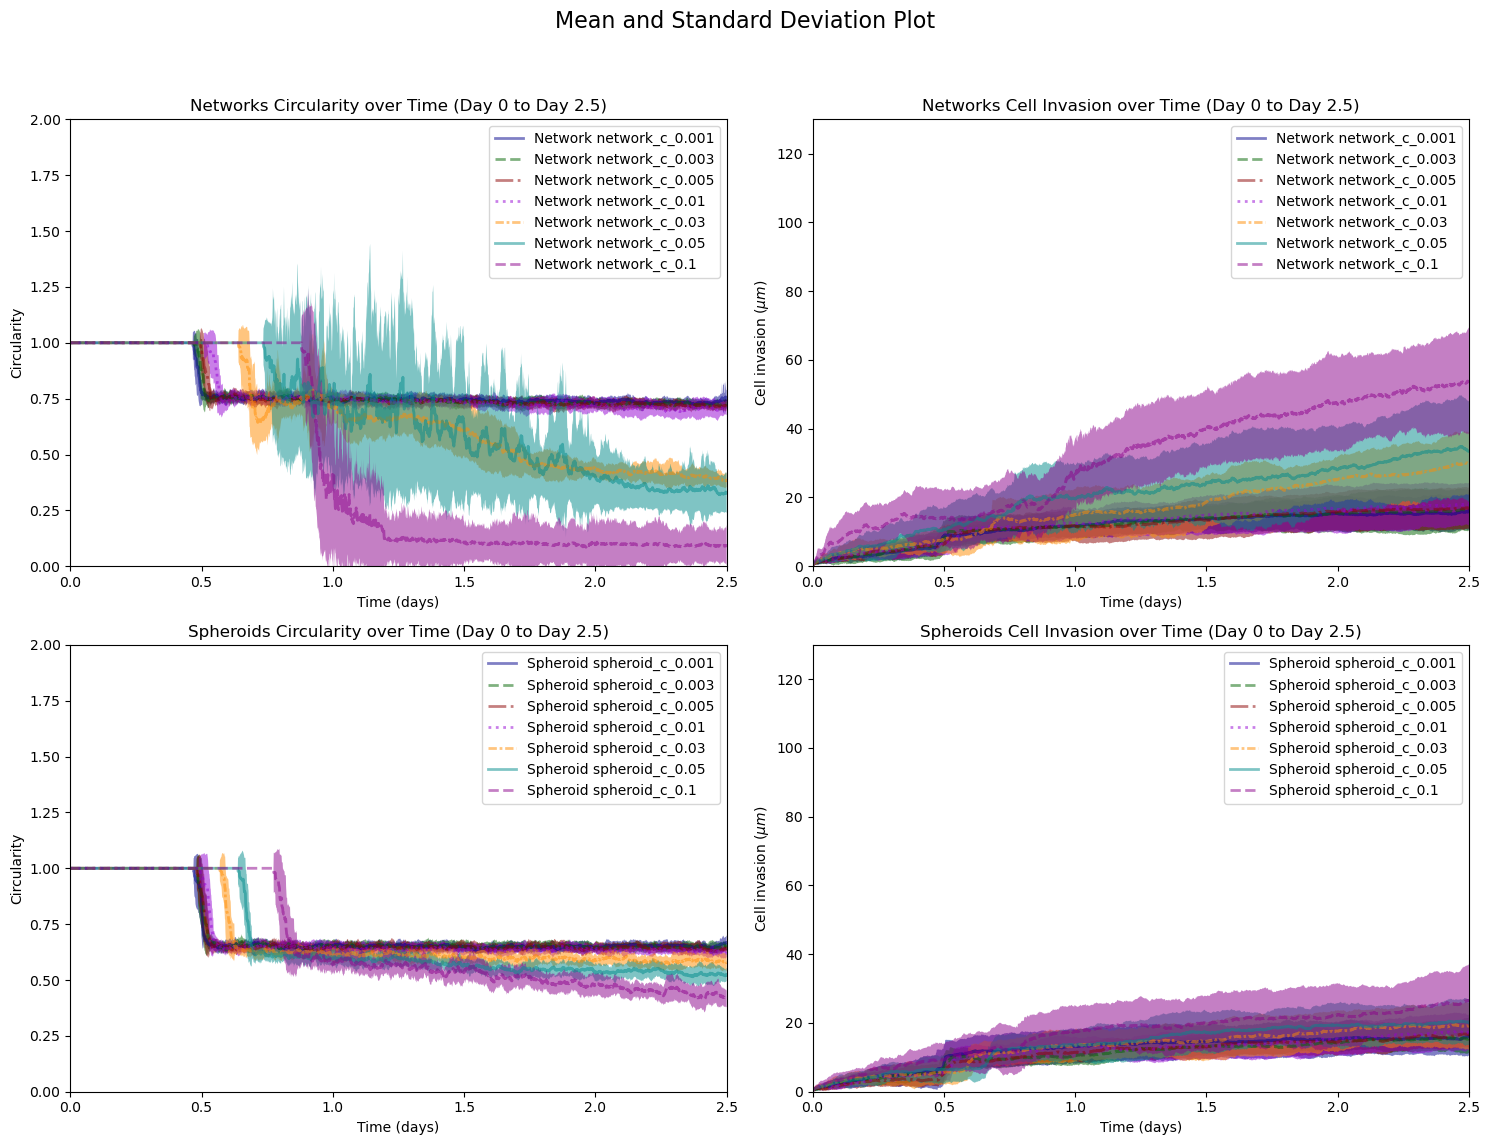

In [19]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Function to read and process data from a given folder
def read_and_process_data(folder_path, file_prefix, file_count=20):
    data_list = []

    # Loop through each CSV file and read the data
    for i in range(1, file_count + 1):
        file_path = os.path.join(folder_path, f'{file_prefix}{i}.csv')
        if os.path.exists(file_path):
            data = pd.read_csv(file_path)
            data['file_index'] = i  # Add an index to distinguish different datasets
            data_list.append(data)
        else:
            print(f"File not found: {file_path}")

    # Concatenate all data into a single DataFrame
    if data_list:
        all_data = pd.concat(data_list, ignore_index=True)
        # Convert mcs to days (1000 mcs = 1 day)
        all_data['days'] = all_data['mcs'] / 1000

        # Multiply cell_invasion by 2 to convert back to experimental value
        all_data['cell_invasion'] *= 2

        # Filter data to include only the first 2.5 days
        filtered_data = all_data[all_data['days'] <= 2.5]

        # Calculate mean and standard deviation
        stats_data = filtered_data.groupby('days').agg({
            'circularity': ['mean', 'std'],
            'cell_invasion': ['mean', 'std']
        }).reset_index()

        # Flatten MultiIndex columns
        stats_data.columns = ['days', 'circularity_mean', 'circularity_std', 'cell_invasion_mean', 'cell_invasion_std']

    else:
        stats_data = pd.DataFrame()

    return stats_data

# Read and process data from each folder
spheroid_folders = ['spheroid_c_0.001', 'spheroid_c_0.003', 'spheroid_c_0.005', 'spheroid_c_0.01', 'spheroid_c_0.03', 'spheroid_c_0.05', 'spheroid_c_0.1']
network_folders = ['network_c_0.001', 'network_c_0.003', 'network_c_0.005', 'network_c_0.01', 'network_c_0.03', 'network_c_0.05', 'network_c_0.1']

# Process spheroid data
spheroid_data = {}
for folder in spheroid_folders:
    spheroid_data[folder] = read_and_process_data(os.path.join('spheroids', folder), 'celldata')

# Process network data
network_data = {}
for folder in network_folders:
    network_data[folder] = read_and_process_data(os.path.join('networks', folder), 'celldata')

# Plotting
fig, ax = plt.subplots(2, 2, figsize=(15, 12))

# Define colors, line styles, and labels for the datasets
colors = ['darkblue', 'darkgreen', 'darkred', 'darkviolet', 'darkorange', 
          'darkcyan', 'darkmagenta', 'darkgoldenrod', 'darkslategray', 'darkkhaki']

line_styles = ['-', '--', '-.', ':', (0, (3, 1, 1, 1))]
alpha_value = 0.5  # Set transparency level for individual datasets

# Plot circularity for Networks
for i, folder in enumerate(network_folders):
    data = network_data[folder]
    if not data.empty:
        sorted_data = data.sort_values(by='days')  # Ensure data is sorted by days
        ax[0, 0].plot(sorted_data['days'], sorted_data['circularity_mean'], label=f'Network {folder}', 
                      color=colors[i % len(colors)], linestyle=line_styles[i % len(line_styles)], linewidth=2, alpha=alpha_value)
        ax[0, 0].fill_between(sorted_data['days'], 
                              sorted_data['circularity_mean'] - sorted_data['circularity_std'], 
                              sorted_data['circularity_mean'] + sorted_data['circularity_std'], 
                              color=colors[i % len(colors)], alpha=alpha_value, edgecolor=None)

# Plot circularity for Spheroids
for i, folder in enumerate(spheroid_folders):
    data = spheroid_data[folder]
    if not data.empty:
        sorted_data = data.sort_values(by='days')  # Ensure data is sorted by days
        ax[1, 0].plot(sorted_data['days'], sorted_data['circularity_mean'], label=f'Spheroid {folder}', 
                      color=colors[i % len(colors)], linestyle=line_styles[i % len(line_styles)], linewidth=2, alpha=alpha_value)
        ax[1, 0].fill_between(sorted_data['days'], 
                              sorted_data['circularity_mean'] - sorted_data['circularity_std'], 
                              sorted_data['circularity_mean'] + sorted_data['circularity_std'], 
                              color=colors[i % len(colors)], alpha=alpha_value, edgecolor=None)

# Plot cell invasion for Networks
for i, folder in enumerate(network_folders):
    data = network_data[folder]
    if not data.empty:
        sorted_data = data.sort_values(by='days')  # Ensure data is sorted by days
        ax[0, 1].plot(sorted_data['days'], sorted_data['cell_invasion_mean'], label=f'Network {folder}', 
                      color=colors[i % len(colors)], linestyle=line_styles[i % len(line_styles)], linewidth=2, alpha=alpha_value)
        ax[0, 1].fill_between(sorted_data['days'], 
                              sorted_data['cell_invasion_mean'] - sorted_data['cell_invasion_std'], 
                              sorted_data['cell_invasion_mean'] + sorted_data['cell_invasion_std'], 
                              color=colors[i % len(colors)], alpha=alpha_value, edgecolor=None)

# Plot cell invasion for Spheroids
for i, folder in enumerate(spheroid_folders):
    data = spheroid_data[folder]
    if not data.empty:
        sorted_data = data.sort_values(by='days')  # Ensure data is sorted by days
        ax[1, 1].plot(sorted_data['days'], sorted_data['cell_invasion_mean'], label=f'Spheroid {folder}', 
                      color=colors[i % len(colors)], linestyle=line_styles[i % len(line_styles)], linewidth=2, alpha=alpha_value)
        ax[1, 1].fill_between(sorted_data['days'], 
                              sorted_data['cell_invasion_mean'] - sorted_data['cell_invasion_std'], 
                              sorted_data['cell_invasion_mean'] + sorted_data['cell_invasion_std'], 
                              color=colors[i % len(colors)], alpha=alpha_value, edgecolor=None)

# Setting titles and labels
ax[0, 0].set_title('Networks Circularity over Time (Day 0 to Day 2.5)')
ax[0, 0].set_xlabel('Time (days)')
ax[0, 0].set_ylabel('Circularity')
ax[0, 0].legend()
ax[0, 0].set_xlim([0, 2.5])  # Ensure the plot is from day 0 to day 2.5
ax[0, 0].set_ylim([0.0, 2.0])
#ax[0, 0].grid(True)

ax[0, 1].set_title('Networks Cell Invasion over Time (Day 0 to Day 2.5)')
ax[0, 1].set_xlabel('Time (days)')
ax[0, 1].set_ylabel('Cell invasion ($ \mu m$)')
ax[0, 1].legend()
ax[0, 1].set_xlim([0, 2.5])  # Ensure the plot is from day 0 to day 2.5
ax[0, 1].set_ylim([0.0, 130.0])
#ax[0, 1].grid(True)

ax[1, 0].set_title('Spheroids Circularity over Time (Day 0 to Day 2.5)')
ax[1, 0].set_xlabel('Time (days)')
ax[1, 0].set_ylabel('Circularity')
ax[1, 0].legend()
ax[1, 0].set_xlim([0, 2.5])  # Ensure the plot is from day 0 to day 2.5
ax[1, 0].set_ylim([0.0, 2.0])
#ax[1, 0].grid(True)

ax[1, 1].set_title('Spheroids Cell Invasion over Time (Day 0 to Day 2.5)')
ax[1, 1].set_xlabel('Time (days)')
ax[1, 1].set_ylabel('Cell invasion ($ \mu m$)')
ax[1, 1].legend()
ax[1, 1].set_xlim([0, 2.5])  # Ensure the plot is from day 0 to day 2.5
ax[1, 1].set_ylim([0.0, 130.0])
#ax[1, 1].grid(True)

# Add an overarching title
fig.suptitle('Mean and Standard Deviation Plot', fontsize=16)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust to make room for the suptitle
plt.savefig('circularity_cell_invasion_networks_spheroids_mean_std_plot.png', dpi=300, bbox_inches='tight')
plt
